<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install delayed

In [ ]:
!pip install fancyimpute  

In [ ]:
!pip install --quiet pandas-datareader

In [ ]:
!pip install --quiet yfinance

In [ ]:
!pip install --quiet fbprophet

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn
from fancyimpute import KNN


import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

from fbprophet import Prophet

%matplotlib inline

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data (3).csv


In [660]:
df = pd.read_csv(io.StringIO(uploaded['owid-covid-data.csv'].decode('utf-8')))

In [661]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [662]:
#Dimensões do data frame
df.shape

(74141, 60)

# **Análise descritiva dos dados**

In [663]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,7.094200e+04,70943.000000,70213.000000,6.492600e+04,65069.000000,70213.000000,70419.000000,70420.000000,69695.000000,64416.000000,64559.000000,69695.000000,59527.000000,7306.000000,7306.000000,9570.000000,9570.000000,714.000000,714.000000,1203.000000,1203.000000,3.266700e+04,3.214000e+04,32140.000000,32667.000000,3.828000e+04,38280.000000,35386.000000,34875.000000,1.290500e+04,1.248300e+04,1.057500e+04,1.068100e+04,2.280900e+04,12905.000000,12483.000000,10575.000000,22809.000000,62361.000000,7.348400e+04,69554.000000,65618.000000,65618.000000,65618.000000,66401.000000,45636.000000,65973.000000,68386.000000,51595.000000,50550.000000,33716.000000,59774.000000,69495.000000,66665.000000,2649.000000
mean,7.685564e+05,4288.232003,4301.165229,2.012024e+04,98.902688,91.151381,13608.123088,75.711113,75.888720,298.877602,1.533738,1.413868,1.006272,617.099918,24.515842,2745.235423,158.032057,275.640789,21.843279,1457.002628,92.659555,3.373411e+04,5.007251e+06,324.210666,2.150988,3.262793e+04,2.029877,0.097022,160.379014,2.786809e+07,1.415908e+07,7.373994e+06,5.752054e+05,2.748370e+05,26.438953,17.603828,11.069312,3325.704459,59.167988,1.006739e+08,417.388066,30.257027,8.710934,5.539211,17931.063554,12.660078,257.185129,7.790804,10.680463,32.358065,51.653862,2.948233,73.090566,0.723605,19.845557
std,4.059763e+06,23040.733892,22819.192974,8.963180e+04,445.717886,414.856426,24648.969672,167.081591,150.206105,543.501427,3.824851,2.992689,0.340857,1144.974163,27.358282,6264.884464,213.851545,600.045459,38.806532,3082.089592,165.091087,1.413671e+05,2.369908e+07,750.687909,5.786107,1.287795e+05,4.968928,0.101945,839.049856,1.353398e+08,6.845105e+07,3.116081e+07,2.541426e+06,1.714296e+06,33.118039,19.922909,15.148302,4773.307721,21.057318,4.473102e+08,1998.540229,8.948838,6.213310,4.258992,18160.569442,20.032168,114.215768,4.201785,10.872225,13.747453,32.563839,2.496525,7.699478,0.151433,39.327383
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1583.000000,-63.000000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.689300e+04,0.000000e+00,0.000000,-8.538000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,2.339000,1.114000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.633000e+03,3.000000,9.286000,6.000000e+01,0.000000,0.000000,315.341000,0.381000,1.600000,9.304000,0.000000,0.000000,0.840000,23.000000,3.933500,90.000000,20.035500,7.017500,1.871250,30.358500,7.774000,1.674000e+03,1.589632e+05,15.471750,0.159000,1.702750e+03,0.154000,0.020000,6.900000,1.125320e+05,8.704900e+04,4.403000e+04,3.528000e+03,8.580000e+02,2.600000,2

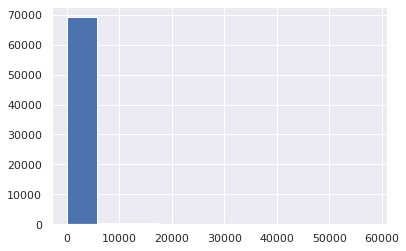

In [664]:
(df['total_cases']/1000).hist()

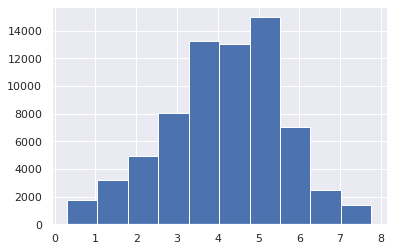

In [665]:
df['log_total_cases'] = df['total_cases'].apply(np.log10)
df[df['log_total_cases'] > 0]['log_total_cases'].hist()

#10^4 é o pico

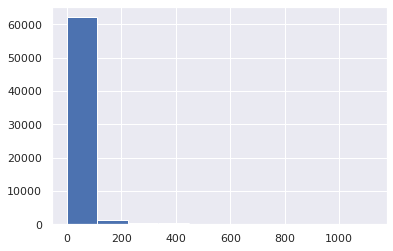

In [666]:
(df['total_deaths']/1000).hist()

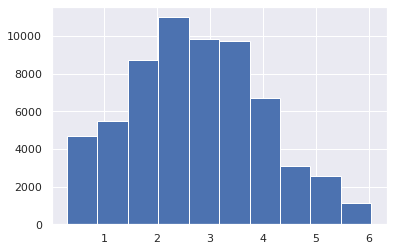

In [667]:
df['log_total_deaths'] = df['total_deaths'].apply(np.log10)
df[df['log_total_deaths'] > 0]['log_total_deaths'].hist()

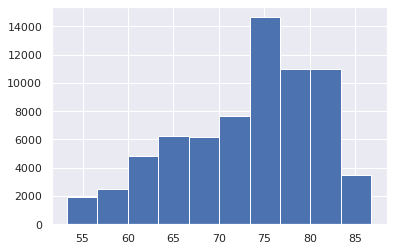

In [668]:
(df['life_expectancy']).hist()

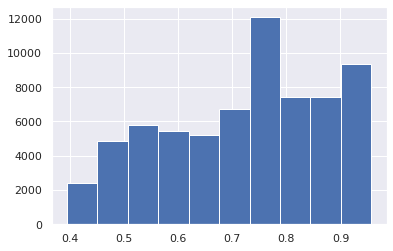

In [669]:
(df['human_development_index']).hist()

Categorização de algumas variáveis com o objetivo de melhorar a compreensão da base de dados usada.

In [670]:
df['hdi_category'] = 'NaN'
df.loc[(df['human_development_index'] >= 0.8), 'hdi_category'] = 'Desenvolvido'
df.loc[(df['human_development_index'] >= 0.555) & (df['human_development_index'] < 0.8 ), 'hdi_category'] = 'Em Desenvolvimento'
df.loc[(df['human_development_index'] >= 0.350) & (df['human_development_index'] < 0.555 ), 'hdi_category'] = 'Subdesenvolvido'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido


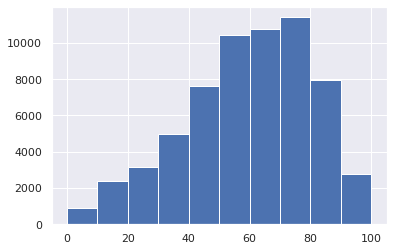

In [671]:
(df['stringency_index']).hist()

In [672]:
df['stringency_index'].describe()

df['stringency_category'] = 'NaN'
df.loc[(df['stringency_index'] >= 74), 'stringency_category'] = 'Alta_estringencia'
df.loc[(df['stringency_index'] >= 60) & (df['stringency_index'] < 74 ), 'stringency_category'] = 'Media_estringencia'
df.loc[(df['stringency_index'] >= 20) & (df['stringency_index'] < 60 ), 'stringency_category'] = 'Baixa_estringencia'
df.loc[(df['stringency_index'] < 20 ), 'stringency_category'] = 'Nenhuma_estringencia'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia


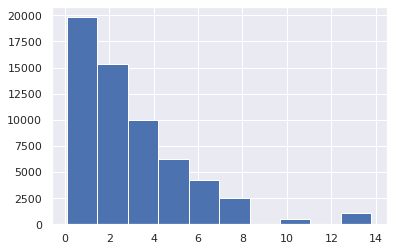

In [673]:
(df['hospital_beds_per_thousand']).hist()

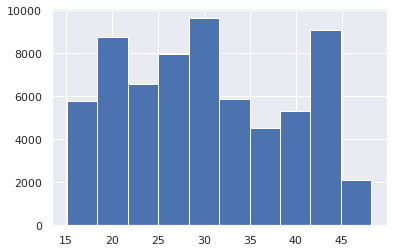

In [674]:
(df['median_age']).hist()

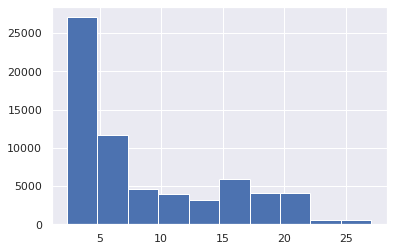

In [675]:
(df['aged_65_older']).hist()

0.25     3.607
0.50     6.211
0.75    13.928
Name: aged_65_older, dtype: float64

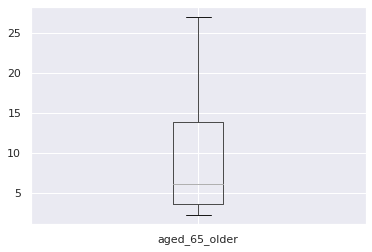

In [676]:
df.boxplot(column=['aged_65_older'])
df['aged_65_older'].quantile([0.25,0.5,0.75])

In [677]:
df['aged_65_older_category'] = 'NaN'
df.loc[(df['aged_65_older'] > 13.928), 'aged_65_older_category'] = 'População com muitíssimos velhos'
df.loc[(df['aged_65_older'] > 6.211) & (df['aged_65_older'] <= 13.928), 'aged_65_older_category'] = 'População com muitos velhos'
df.loc[(df['aged_65_older'] > 3.607) & (df['aged_65_older'] <= 6.211), 'aged_65_older_category'] = 'População com poucos velhos'
df.loc[(df['aged_65_older'] <= 3.607), 'aged_65_older_category'] = 'População com pouquíssimos velhos'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos


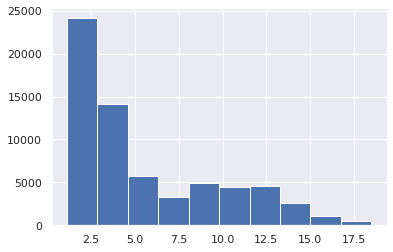

In [678]:
(df['aged_70_older']).hist()

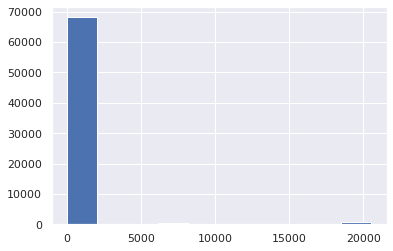

In [679]:
(df['population_density']).hist()

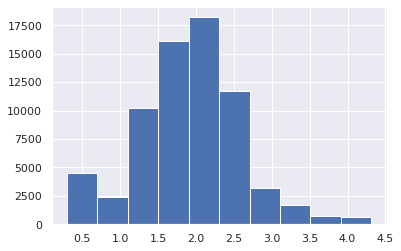

In [680]:
df['log_population_density'] = df['population_density'].apply(np.log10)
df[df['log_population_density'] > 0]['log_population_density'].hist()

In [681]:
df['density_category'] = 'NaN'
df.loc[(df['population_density'] > 500), 'density_category'] = 'Altamente Povoado'
df.loc[(df['population_density'] >= 101) & (df['population_density'] <= 500 ), 'density_category'] = 'Muito Povoado'
df.loc[(df['population_density'] >= 41) & (df['population_density'] <= 100 ), 'density_category'] = 'Povoado'
df.loc[(df['population_density'] >= 11) & (df['population_density'] <= 40 ), 'density_category'] = 'Pouco Povoado'
df.loc[(df['population_density'] >= 2) & (df['population_density'] <= 10 ), 'density_category'] = 'Pouquíssimo  Povoado'
df.loc[(df['population_density'] < 2), 'density_category'] = 'Não Povoado'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado


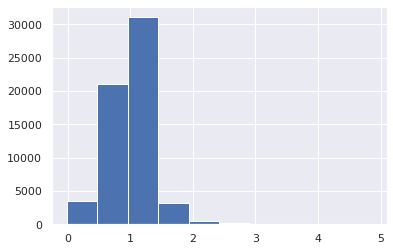

In [682]:
(df['reproduction_rate']).hist()

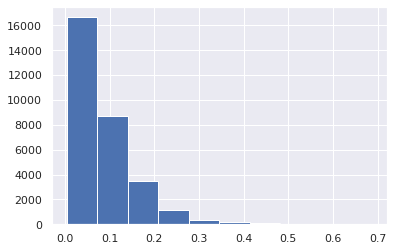

In [683]:
df['log_reproduction_rate'] = df['reproduction_rate'].apply(np.log10)
df[df['log_reproduction_rate'] > 0]['log_reproduction_rate'].hist()

## Estatísticas univariadas

In [684]:
print('Mean: ')
print(df[df['location'] == 'Brazil']['total_cases'].mean())

print('Median: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

print('Mode: ')
print(df[df['location'] == 'Brazil']['total_cases'].mode())

Mean: 
6866582.305555556
Median: 
5578037.0
Mode: 
0    2.0
dtype: float64


In [685]:
def est_univ(col_base, val_col_base, col_exp):
  print('Mean: ')
  print(df[df[col_base] == val_col_base][col_exp].mean())

  print('')

  print('Median: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Mode: ')
  print(df[df[col_base] == val_col_base][col_exp].mode())

  print('')

  print('Variance: ')
  print(df[df[col_base] == val_col_base][col_exp].var())

  print('')

  print('STD: ')
  print(df[df[col_base] == val_col_base][col_exp].std())

  print('')

  print('Describe: ')
  print(df[df[col_base] == val_col_base][col_exp].describe())

In [686]:
est_univ('continent', 'South America', 'total_cases')

Mean: 
1306204.443301275

Median: 
260059.0

Mode: 
0    1.0
dtype: float64

Variance: 
8481236338601.818

STD: 
2912256.2281849133

Describe: 
count    4.471000e+03
mean     1.306204e+06
std      2.912256e+06
min      1.000000e+00
25%      1.867250e+04
50%      2.600590e+05
75%      1.174813e+06
max      1.915199e+07
Name: total_cases, dtype: float64


In [687]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [688]:
IQR(df, 'total_cases')

145890.25

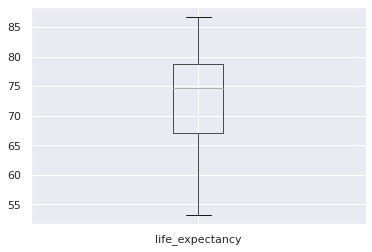

In [689]:
df.boxplot(column=['life_expectancy'])

In [690]:
df[df['continent']=='South America'].groupby(['location']).agg(['mean','median'])['total_cases']

,mean,median
location,,
Argentina,1.399716e+06,1232832.5
Bolivia,1.637320e+05,142720.0
Brazil,6.866582e+06,5578037.0
Chile,5.936834e+05,513140.0
Colombia,1.402923e+06,1143887.0
Ecuador,1.898816e+05,172145.5
Falkland Islands,NaN,NaN
Guyana,5.989630e+03,4618.0
Paraguay,1.144177e+05,67948.0


In [691]:
def compare_mean_median_continent(continent_name, label):
  return df[df['continent']== continent_name].groupby(['location']).agg(['mean','median'])[label]

In [692]:
compare_mean_median_continent('Asia', 'total_cases')

,mean,median
location,,
Afghanistan,4.281838e+04,41680.5
Armenia,1.052697e+05,100668.0
Azerbaijan,1.349379e+05,61605.5
Bahrain,9.018211e+04,82248.0
Bangladesh,4.079472e+05,421921.0
Bhutan,5.732465e+02,359.0
Brunei,1.680915e+02,148.0
Cambodia,5.546910e+03,285.5
China,8.342852e+04,85718.0


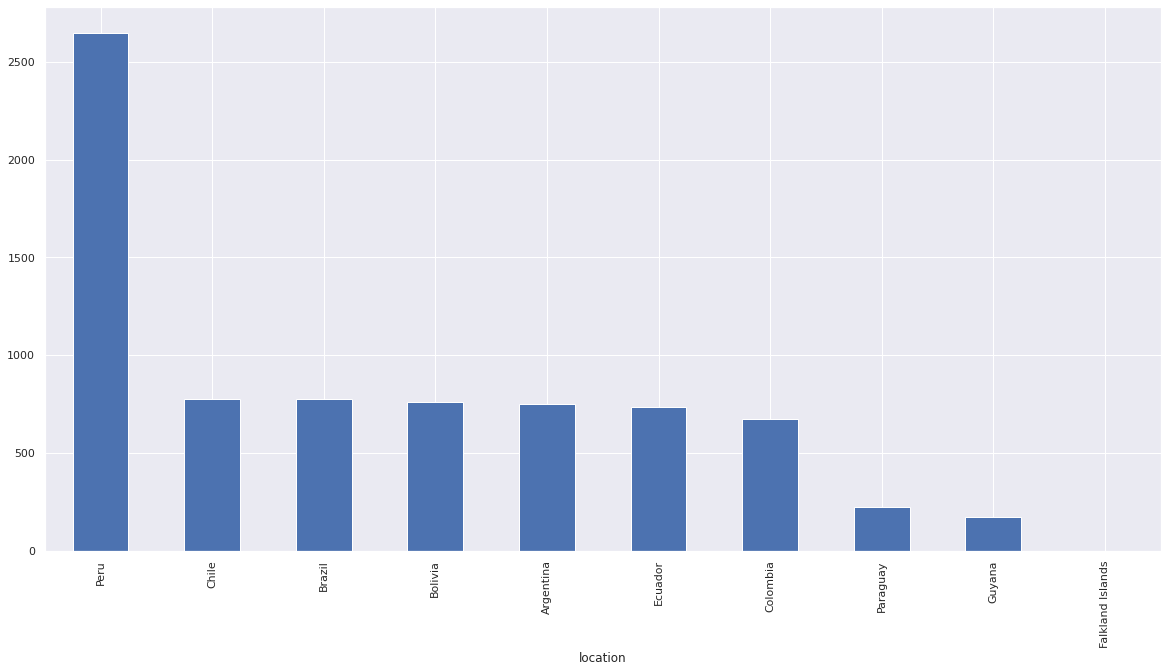

In [693]:
# Medianas

df[df['continent']=='South America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

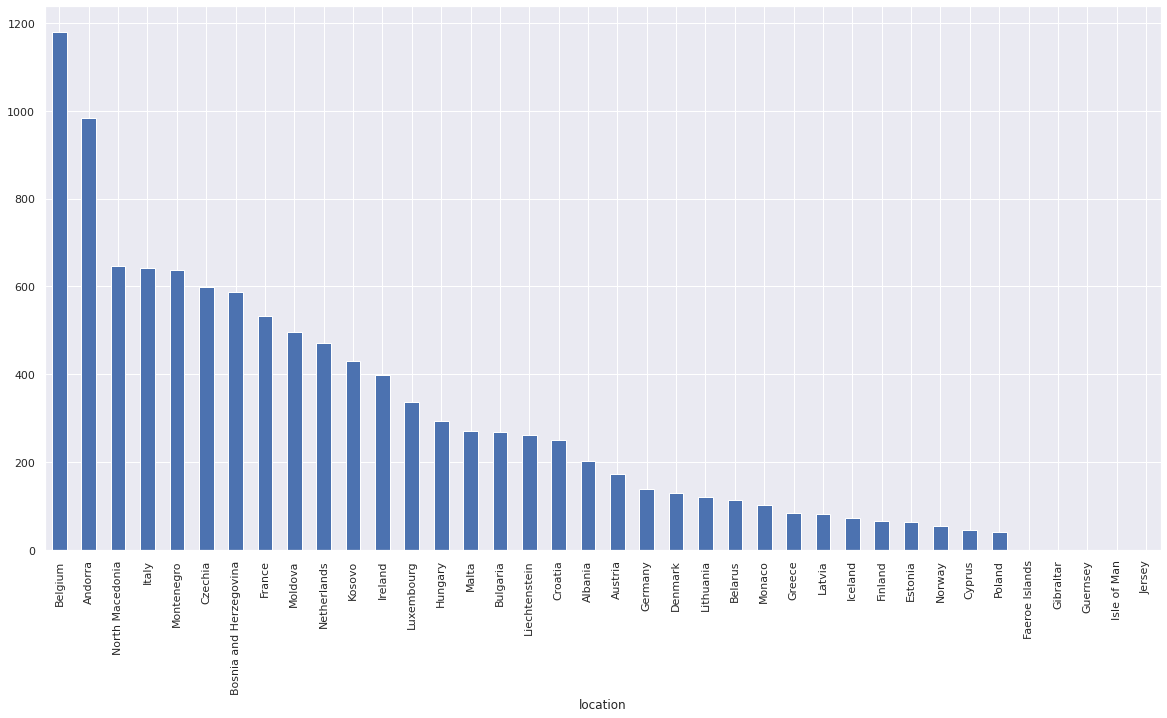

In [694]:
df[df['continent']=='Europe'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

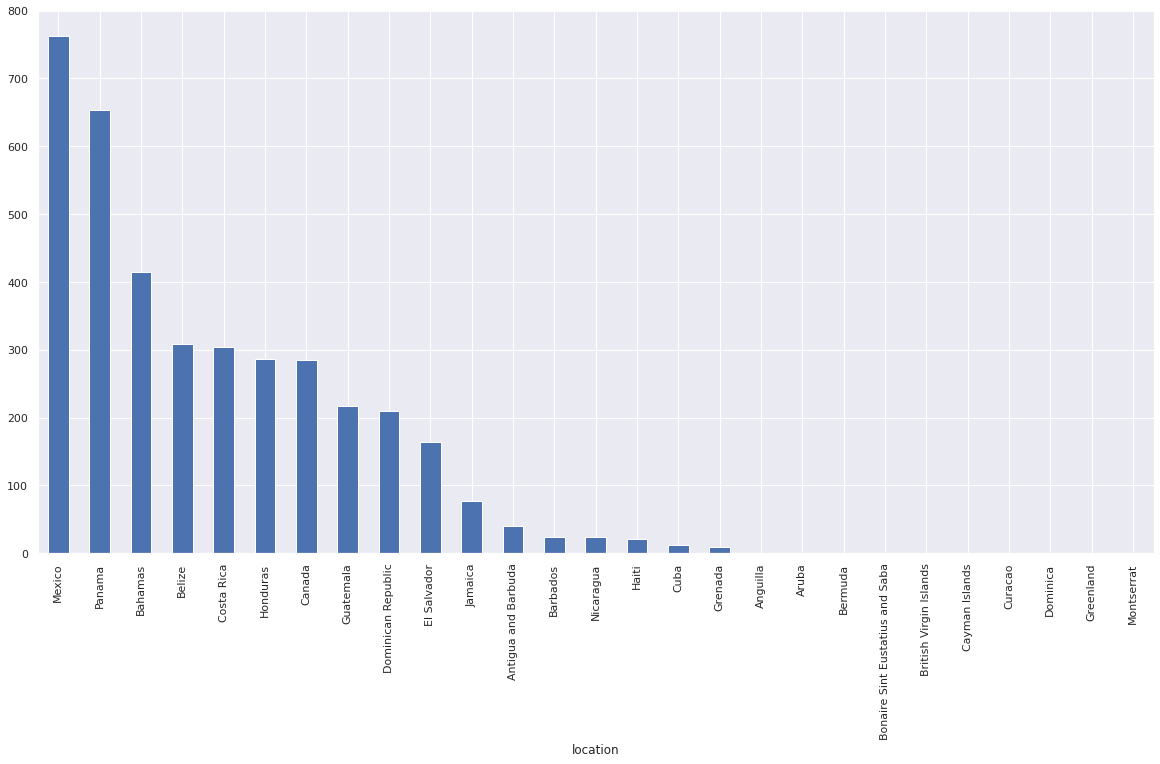

In [695]:
df[df['continent']=='North America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

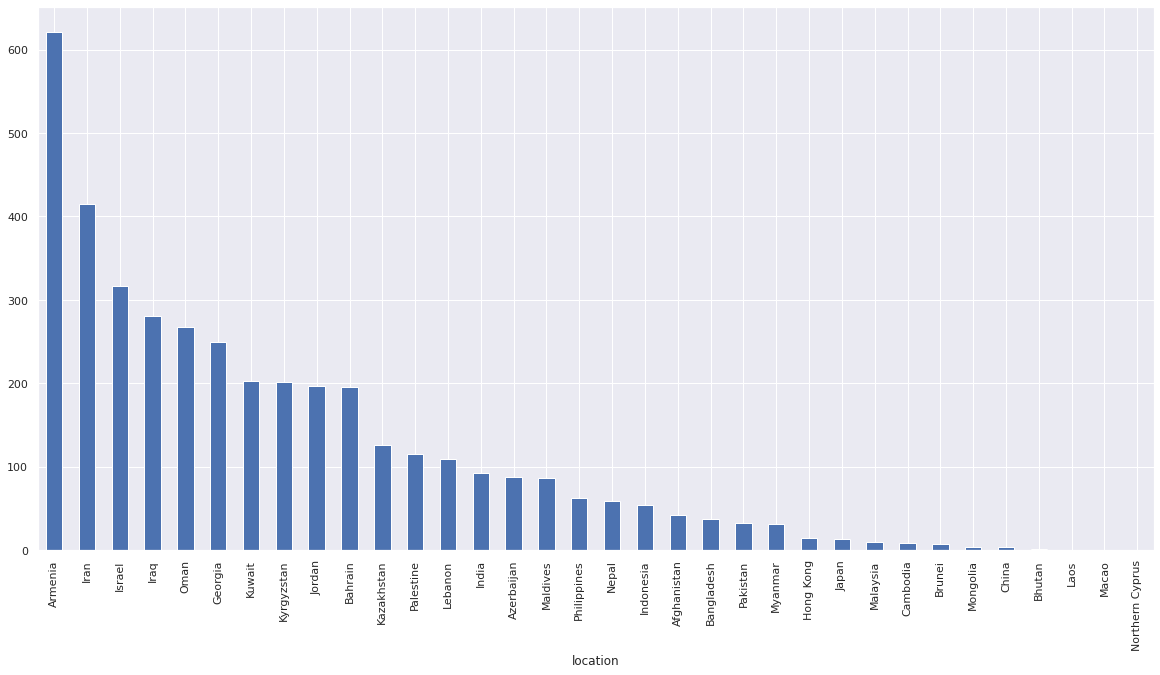

In [696]:
df[df['continent']=='Asia'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

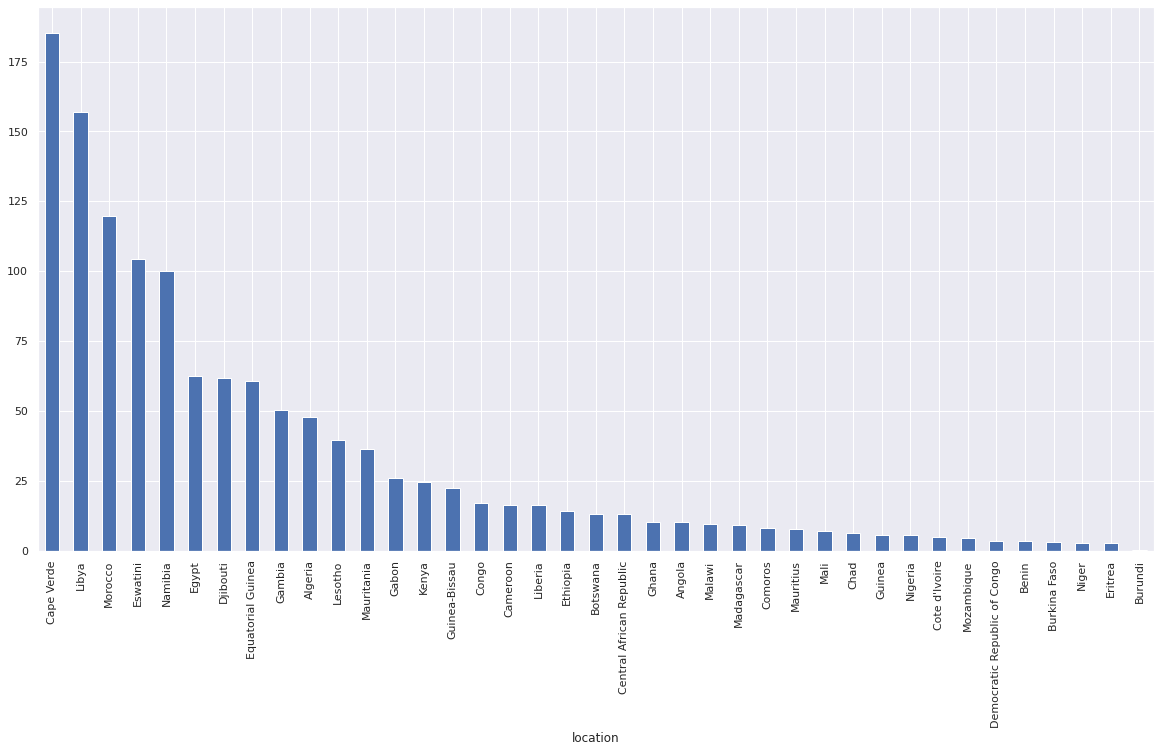

In [697]:
df[df['continent']=='Africa'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

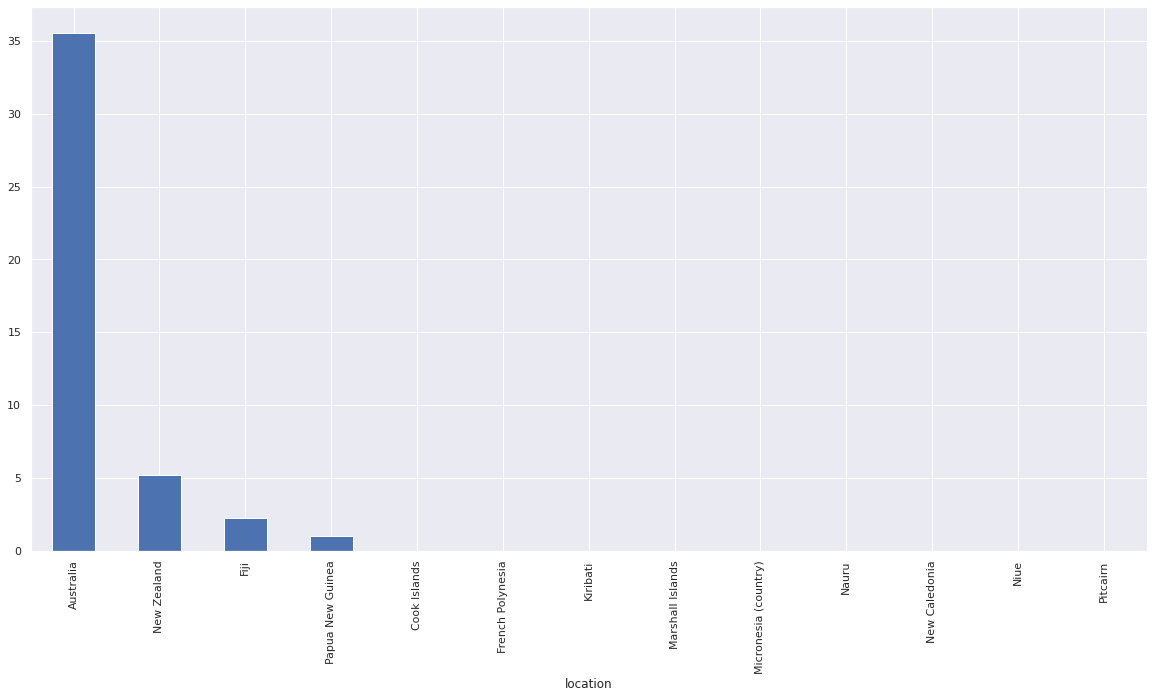

In [698]:
df[df['continent']=='Oceania'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

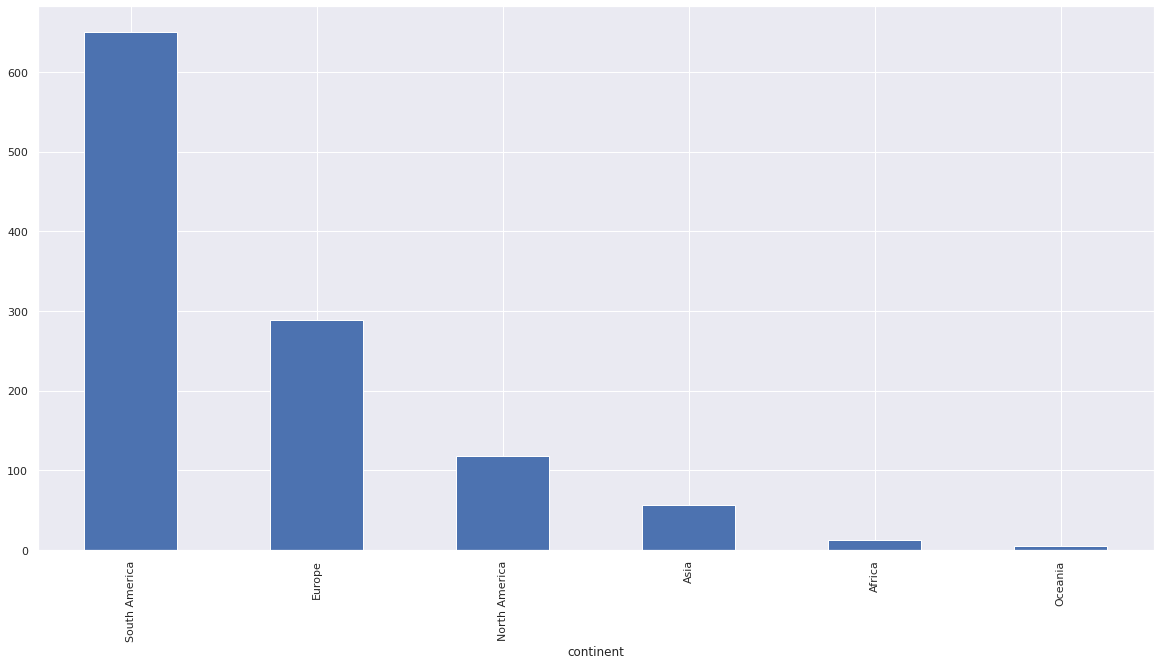

In [699]:
df.groupby(['continent'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

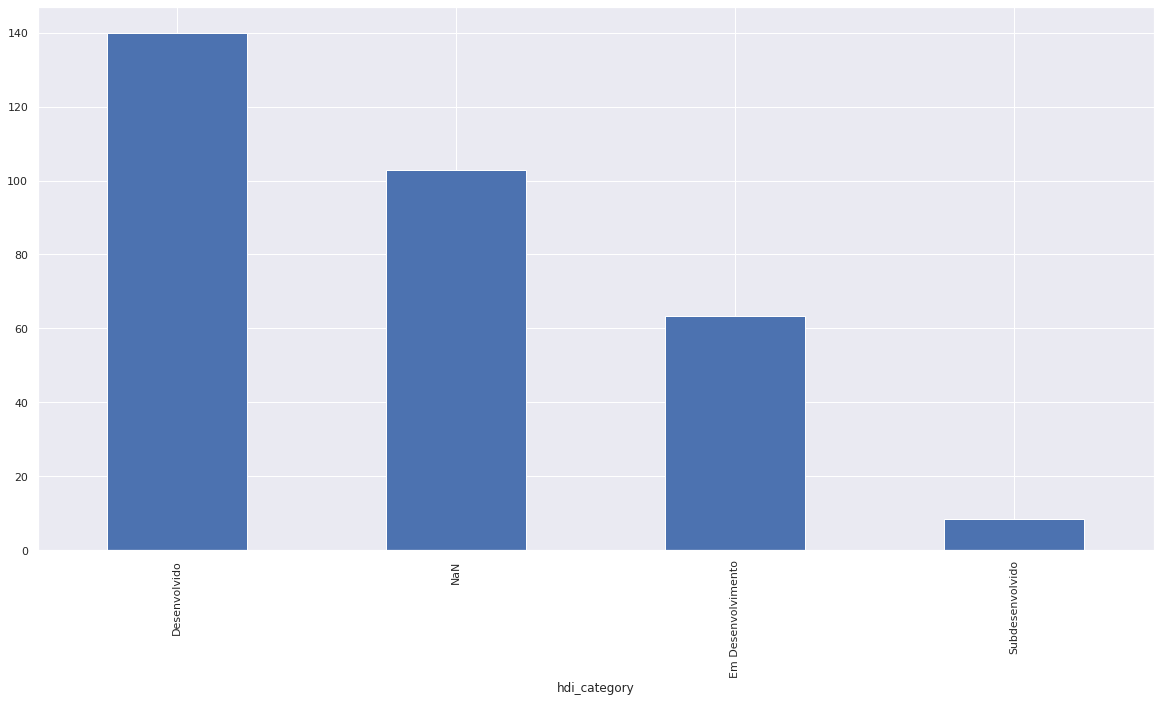

In [700]:
df.groupby(['hdi_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

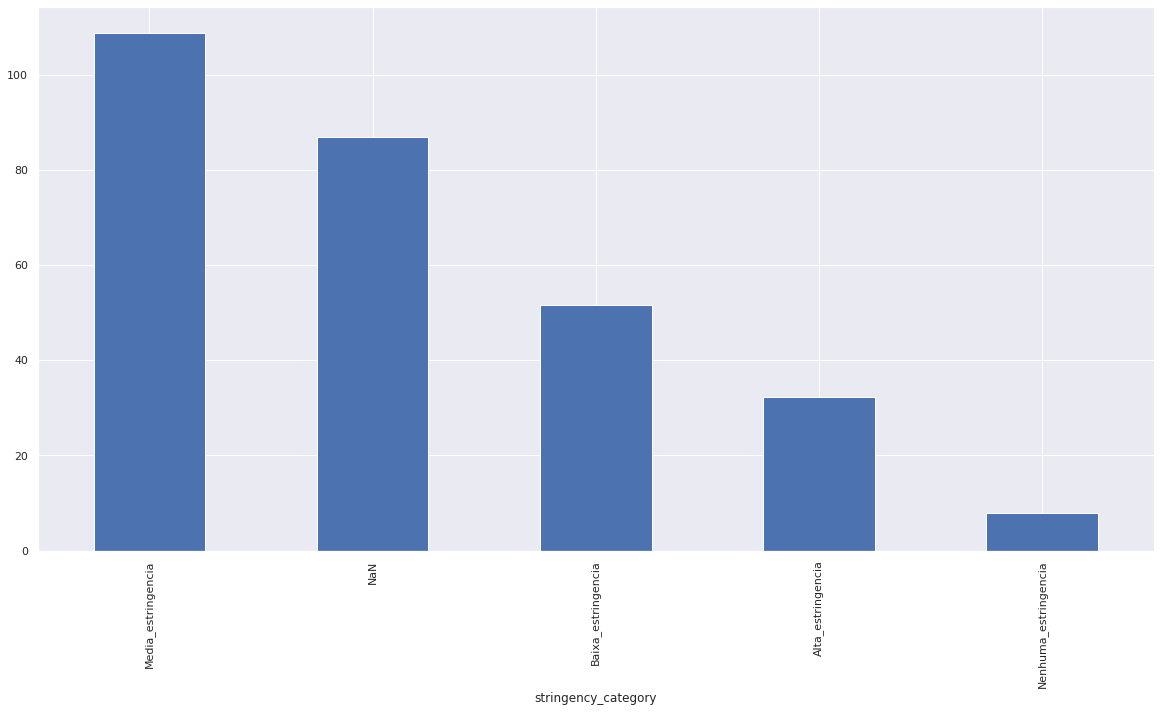

In [701]:
df.groupby(['stringency_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

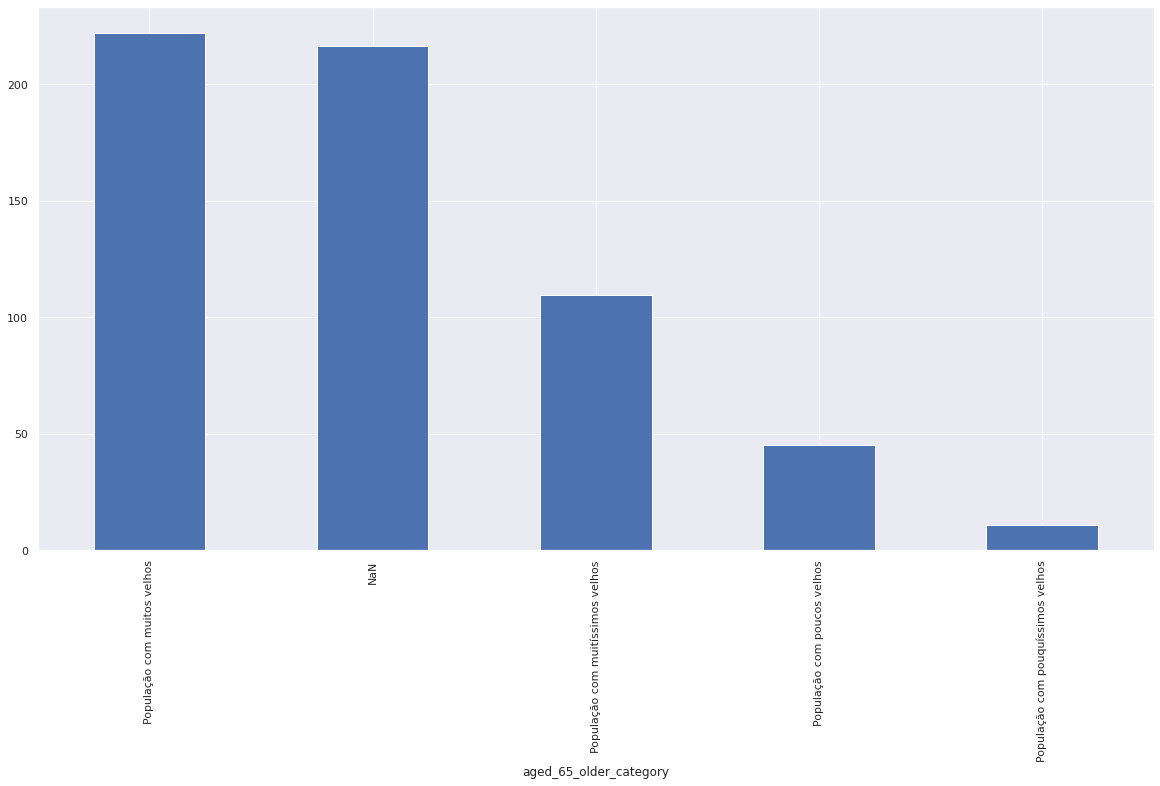

In [702]:
df.groupby(['aged_65_older_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Estatísticas bivariadas

In [703]:
df.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.648167e+13,6.800189e+10,6.936945e+10,3.647147e+11,1.351090e+09,1.269830e+09,1.865702e+10,5.433380e+07,5.592747e+07,4.957595e+08,1.344359e+06,1.367045e+06,-7.577797e+03,8.057632e+08,9.712172e+06,3.487982e+09,4.449772e+07,3.398917e+08,6.693698e+06,1.615916e+09,2.078296e+07,2.110364e+11,3.794074e+13,4.228792e+06,4.154817e+04,1.863711e+11,3.454443e+04,3957.258524,-4.969691e+07,7.795686e+14,4.651181e+14,2.401066e+14,1.421637e+13,7.572493e+12,1.154907e+07,4.851734e+06,-8.334684e+05,1.751583e+09,2.751472e+06,8.601858e+14,-4.677080e+07,9.833606e+05,4.720532e+05,3.024774e+05,3.053253e+08,-1.592956e+06,-1.378330e+07,1.486093e+05,1.551553e+05,-2.106204e+06,3.214475e+06,-1.140249e+05,7.642327e+05,1.311742e+04,6.144752e+06,2.256064e+06,2.283851e+06,4.011084e+04,4.940050e+03
new_cases,6.800189e+10,5.308754e+08,5.209998e+08,1.453069e+09,9.262802e+06,8.232500e+06,5.416482e+07,5.509997e+05,4.969463e+05,1.510597e+06,1.072829e+04,9.477916e+03,1.178944e+02,5.427931e+06,7.597581e+04,2.483791e+07,4.193368e+05,2.832373e+06,4.930985e+04,1.368130e+07,2.175752e+05,1.384778e+09,2.115984e+11,-2.250841e+05,-5.970039e+02,1.200721e+09,-6.277433e+02,132.400680,-3.703540e+05,2.563424e+12,1.371585e+12,5.695897e+11,5.675032e+10,2.964252e+10,-1.148069e+05,-8.735356e+04,-7.896776e+04,-1.824875e+06,2.226179e+04,5.230412e+12,-2.612110e+05,5.314197e+03,2.340984e+03,1.446065e+03,6.201754e+05,-7.925658e+03,-7.323225e+04,1.040016e+03,-1.123971e+02,-1.252103e+04,1.940592e+04,-8.226721e+02,3.995144e+03,6.765669e+01,4.953000e+04,1.175386e+04,1.188578e+04,2.746309e+02,1.014000e+02
new_cases_smoothed,6.936945e+10,5.209998e+08,5.207156e+08,1.464728e+09,9.147232e+06,8.356754e+06,5.571728e+07,4.967642e+05,4.979969e+05,1.542274e+06,1.015789e+04,9.701343e+03,8.055352e+01,5.579099e+06,7.931795e+04,2.537171e+07,4.335423e+05,2.660822e+06,6.691865e+04,1.452703e+07,2.752187e+05,1.399945e+09,2.149529e+11,-2.158371e+05,-6.070475e+02,1.223024e+09,-5.767228e+02,128.793687,-3.684171e+05,2.600994e+12,1.383278e+12,5.744579e+11,5.742770e+10,3.011366e+10,-1.129600e+05,-8.605132e+04,-7.898530e+04,-1.553195e+06,2.201415e+04,5.240249e+12,-2.616430e+05,5.338134e+03,2.364096e+03,1.463107e+03,6.313196e+05,-7.906617e+03,-7.368240e+04,1.049263e+03,-7.642122e+01,-1.268357e+04,1.938668e+04,-8.238662e+02,4.008003e+03,6.782414e+01,4.959108e+04,1.167930e+04,1.185161e+04,2.762167e+02,8.584760e+01
total_deaths,3.647147e+11,1.453069e+09,1.464728e+09,8.033860e+09,2.863930e+07,2.898359e+07,4.473199e+08,1.248527e+06,1.281820e+06,1.459552e+07,4.168745e+04,4.272149e+04,-1.362693e+02,1.994417e+07,1.963413e+05,9.778542e+07,1.161265e+06,6.997568e+06,8.785849e+04,4.169185e+07,2.695697e+05,2.952823e+09,5.274856e+11,-8.768324e+05,-5.262558e+03,2.641400e+09,-4.729838e+03,392.988633,-1.357498e+06,1.331980e+13,8.25289

In [704]:
df[df.location=='Brazil'].corr(method='pearson')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000e+00,6.842274e-01,8.416601e-01,9.945676e-01,6.259242e-01,7.664819e-01,1.000000e+00,6.842275e-01,8.416601e-01,9.945676e-01,6.259241e-01,7.664802e-01,-4.912677e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.909522e-01,9.909520e-01,NaN,6.449839e-01,6.448438e-01,NaN,NaN,9.697926e-01,9.603349e-01,9.797239e-01,6.425679e-01,9.120679e-01,9.697913e-01,9.603365e-01,9.797147e-01,9.120706e-01,-1.418515e-01,NaN,-3.223809e-15,NaN,3.908070e-15,5.205689e-15,0.000000e+00,-6.738913e-15,-3.908070e-15,-5.205689e-15,-5.273296e-15,-7.429219e-15,NaN,5.072240e-15,5.205689e-15,3.223809e-15,7.726739e-01,6.454896e-01,6.868978e-01,0.000000e+00,-5.381078e-01
new_cases,6.842274e-01,1.000000e+00,8.202411e-01,6.479161e-01,8.590213e-01,7.111357e-01,6.842274e-01,1.000000e+00,8.202411e-01,6.479161e-01,8.590231e-01,7.111400e-01,-4.980023e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.072123e-01,2.072119e-01,NaN,4.021719e-01,4.026709e-01,NaN,NaN,5.349596e-02,2.711183e-02,-2.669430e-03,3.428876e-01,7.937570e-02,5.348405e-02,2.710256e-02,-2.564063e-03,7.937072e-02,9.114562e-02,NaN,2.725382e-15,NaN,-3.281312e-15,-4.317496e-15,1.421884e-18,5.509767e-15,3.281312e-15,4.317496e-15,4.408876e-15,6.153911e-15,NaN,-4.281801e-15,-4.317496e-15,-2.725382e-15,7.793551e-01,6.286083e-01,6.224722e-01,-1.421884e-18,-5.137211e-01
new_cases_smoothed,8.416601e-01,8.202411e-01,1.000000e+00,8.209786e-01,7.279451e-01,8.694807e-01,8.416601e-01,8.202411e-01,1.000000e+00,8.209785e-01,7.279447e-01,8.694837e-01,-6.307754e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.329274e-01,6.329280e-01,NaN,6.278155e-01,6.280342e-01,NaN,NaN,2.038988e-01,1.765016e-01,7.858994e-02,2.856910e-01,2.675811e-01,2.038861e-01,1.765135e-01,7.858372e-02,2.675716e-01,2.307116e-02,NaN,-5.300666e-16,NaN,1.813505e-15,-1.712521e-15,5.300666e-16,8.560805e-16,-1.712521e-15,-1.101844e-15,1.813505e-15,-2.237494e-16,NaN,-1.101844e-15,1.345004e-15,-1.267933e-15,8.028480e-01,7.724238e-01,7.737845e-01,1.776884e-15,-6.605425e-01
total_deaths,9.945676e-01,6.479161e-01,8.209786e-01,1.000000e+00,6.190641e-01,7.509176e-01,9.945676e-01,6.479162e-01,8.209786e-01,1.000000e+00,6.190640e-01,7.509155e-01,-5.072394e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.842116e-01,9.842114e-01,NaN,6.677565e-01,6.676835e-01,NaN,NaN,9.715133e-01,9.593491e-01,9.824684e-01,6.375693e-01,9.090884e-01,9.715124e-01,9.593491e-01,9.824588e-01,9.090918e-01,-6.133759e-01,NaN,-7.051109e-16,NaN,6.234282e-15,-4.802200e-15,1.560319e-15,-7.690093e-15,5.340977e-15,-5.094207e-15,6.234282e-15,7.465359e-15,NaN,-5.094207e-15,-5.340977e-15,-2.760287e-15,7.401271e-01,7.347516e-01,6.913450e-01,2.760287e-15,-5.553472e-01
new_deaths,6.259242e-01,8.590213e-01,7.279451e-01,6.190641e-01,1.000000e+00,8.435924e-01,6.259242e-01,8.590213e-01,7.279449e-01,6.190641e-01,1.000000e+00,8.435948e-01

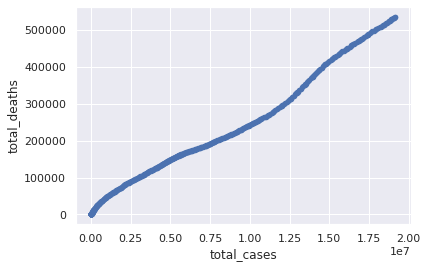

In [705]:
df[df.location=='Brazil'].plot.scatter(x='total_cases',y='total_deaths')

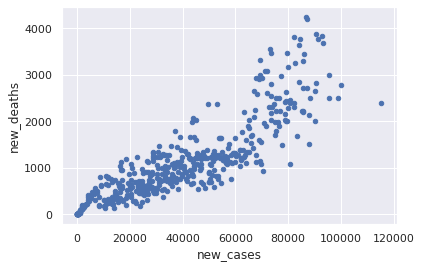

In [706]:
df[df.location=='Brazil'].plot.scatter(x='new_cases',y='new_deaths')

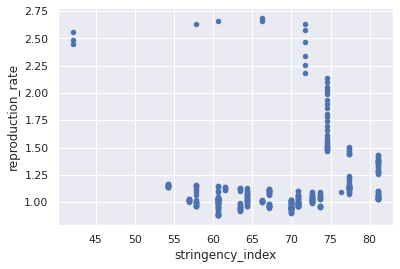

In [707]:
df[df.location=='Brazil'].plot.scatter(x='stringency_index',y='reproduction_rate')

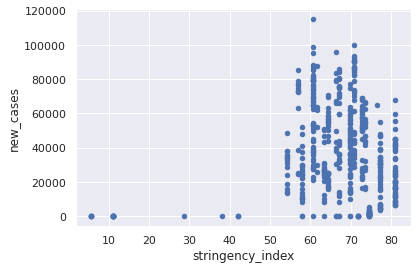

In [708]:
df[df.location=='Brazil'].plot.scatter(x='stringency_index',y='new_cases')

In [709]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN


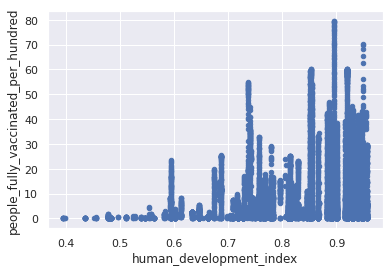

In [710]:
df.plot.scatter(x='human_development_index',y='people_fully_vaccinated_per_hundred')

Segue uma tendência de quanto maior o IDH, maior a taxa de pessoas vacinadas

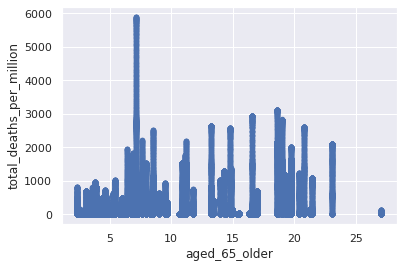

In [711]:
df.plot.scatter(x='aged_65_older',y='total_deaths_per_million')

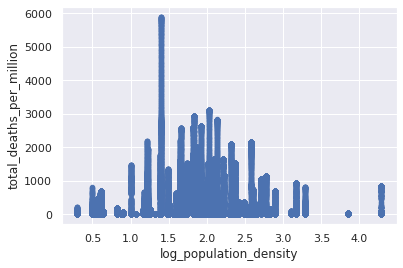

In [712]:
df.plot.scatter(x='log_population_density',y='total_deaths_per_million')

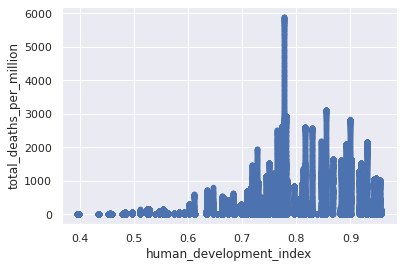

In [713]:
df.plot.scatter(x='human_development_index',y='total_deaths_per_million')

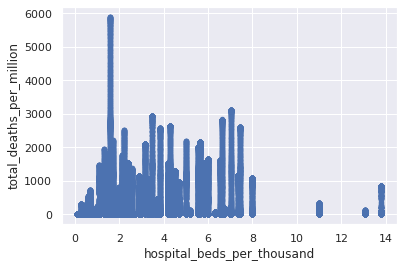

In [714]:
df.plot.scatter(x='hospital_beds_per_thousand',y='total_deaths_per_million')

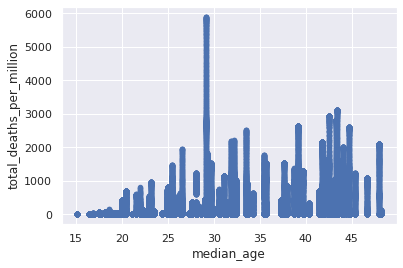

In [715]:
#median_age
df.plot.scatter(x='median_age',y='total_deaths_per_million')

# **Testes de hipótese**

Nessa etapa inicial vamos analizar, separadamente, nos anos de 2020 e 2021, no Brasil, realizando testes de hipóteses para obtermos resultados de como foi o comportamento da pandemia em cada período de tempo



In [716]:
# Transformar a coluna date no tipo data
df['date'] = pd.to_datetime(df['date'])

In [717]:
# Primeiro ano de pandemia

casos_brasil_inicio = df.loc[(df['date'].dt.year == 2020) & (df['date'].dt.month >= 2)]

casos_brasil_inicio[casos_brasil_inicio.location=='Brazil']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
12995,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12996,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12997,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.000000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12998,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91,0.301030,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
12999,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,0.301030,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13300,BRA,South America,Brazil,2020-12-27,7484285.0,18479.0,35097.857,191139.0,344.0,625.000,35210.321,86.936,165.120,899.226,1.618,2.940,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.7

In [718]:
# Segundo ano de pandemia

casos_brasil_depois = df.loc[(df['date'].dt.year == 2021)]

casos_brasil_depois[casos_brasil_depois.location=="Brazil"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
13305,BRA,South America,Brazil,2021-01-01,7700578.0,24605.0,36002.571,195411.0,462.0,703.286,36227.886,115.756,169.377,919.324,2.174,3.309,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.886523,5.290949,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.008600
13306,BRA,South America,Brazil,2021-01-02,7716405.0,15827.0,35799.857,195725.0,314.0,704.286,36302.345,74.459,168.423,920.801,1.477,3.313,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.887415,5.291646,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.012837
13307,BRA,South America,Brazil,2021-01-03,7733746.0,17341.0,35637.286,196018.0,293.0,697.000,36383.927,81.582,167.658,922.180,1.378,3.279,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.888390,5.292296,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.021189
13308,BRA,South America,Brazil,2021-01-04,7753752.0,20006.0,35559.857,196561.0,543.0,713.000,36478.046,94.120,167.294,924.734,2.555,3.354,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.889512,5.293497,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.033424
13309,BRA,South America,Brazil,2021-01-05,7810400.0,56648.0,35264.143,197732.0,1171.0,721.571,36744.551,266.504,165.903,930.243,5.509,3.395,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6.892673,5.296077,Em Desenvolvimento,Media_estringencia,População com muitos velhos,1.398634,Pouco Povoado,0.045323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,BRA,South America,Brazil,2021-07-09,19020499.0,57737.0,47575.71

In [719]:
casos_brasil_inicio['new_deaths_per_million'].describe()

count    37745.000000
mean         1.199661
std          3.520077
min        -76.445000
25%          0.000000
50%          0.088000
75%          0.921000
max        218.329000
Name: new_deaths_per_million, dtype: float64

In [720]:
casos_brasil_depois['new_deaths_per_million'].describe()

count    26760.000000
mean         2.008044
std          4.174916
min        -20.593000
25%          0.000000
50%          0.283000
75%          2.191250
max        104.885000
Name: new_deaths_per_million, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



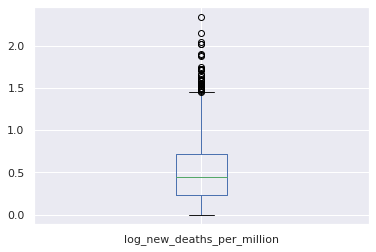

In [721]:
casos_brasil_inicio['log_new_deaths_per_million'] = casos_brasil_inicio['new_deaths_per_million'].apply(np.log10)
casos_brasil_inicio[casos_brasil_inicio['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



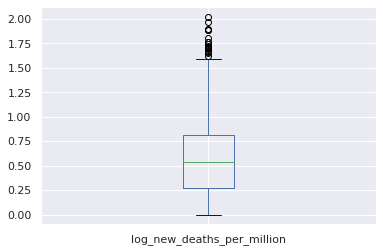

In [722]:
casos_brasil_depois['log_new_deaths_per_million'] = casos_brasil_depois['new_deaths_per_million'].apply(np.log10)
casos_brasil_depois[casos_brasil_depois['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


*   H0: O número de mortes por milhão não diminuiu em 2021

*   H1: O número de mortes por milhão diminuiu em 2021




In [723]:
stats.shapiro(casos_brasil_inicio['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.34480202198028564, pvalue=0.0)

In [724]:
stats.shapiro(casos_brasil_depois['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.5199995040893555, pvalue=0.0)

Os p-values obtidos foram muito baixos, portanto, ambas amostras não seguem uma distribuição normal. Então, usaremos o teste mann-whitney para amostras não pareadas.

In [725]:
stats.mannwhitneyu(casos_brasil_inicio['new_deaths_per_million'], casos_brasil_depois['new_deaths_per_million'], alternative='less')

MannwhitneyuResult(statistic=597052175.5, pvalue=1.779043938193127e-120)

O p-value possue um valor menos do que o nível de significância (geralmente adotado como 0,05) portanto, ele rejeita a hipótese alternativa de que os casos novos de morte por covid diminuiram em 2021.

################################################################################

## Agora, iremos verificar a eficácia das medidas de restrição adotadas pelos governadores. Estratificamos o dataset em alta estringência e baixa estringência.

H0: A taxa de reprodução do virus não com medidas de restrição baixa não mudou ou esteve maior do que com altas medidas de restrições.
H1: A taxa de reprodução do virus diminuiu com altas medidas de restrições.

In [726]:
strin_brasil_Hi = df.loc[(df['stringency_category'] == 'Alta_estringencia')]

strin_brasil_Hi = strin_brasil_Hi[strin_brasil_Hi.location=="Brazil"]

In [727]:
strin_brasil_Lo = df.loc[(df['stringency_category'] == 'Nenhum_estringencia') | (df['stringency_category'] == 'Baixa_estringencia')]

strin_brasil_Lo = strin_brasil_Lo[strin_brasil_Lo.location=="Brazil"]

In [728]:
strin_brasil_Lo['reproduction_rate'].describe()

count    54.000000
mean      1.177963
std       0.393889
min       0.970000
25%       1.002500
50%       1.080000
75%       1.150000
max       2.630000
Name: reproduction_rate, dtype: float64

In [729]:
strin_brasil_Hi['reproduction_rate'].describe()

count    125.000000
mean       1.328880
std        0.270042
min        1.030000
25%        1.110000
50%        1.280000
75%        1.480000
max        2.140000
Name: reproduction_rate, dtype: float64

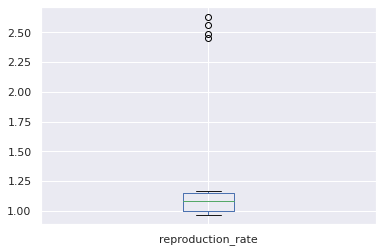

In [730]:
strin_brasil_Lo['reproduction_rate'].plot(kind='box')

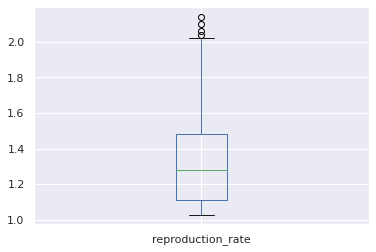

In [731]:
strin_brasil_Hi['reproduction_rate'].plot(kind='box')

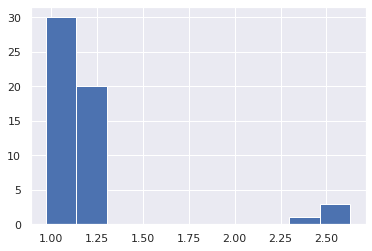

In [732]:
strin_brasil_Lo['reproduction_rate'].dropna().hist()

In [733]:
stats.jarque_bera(strin_brasil_Lo['reproduction_rate'].dropna())

Jarque_beraResult(statistic=227.05336634108215, pvalue=0.0)

In [734]:
stats.shapiro(strin_brasil_Lo['reproduction_rate'].dropna())

ShapiroResult(statistic=0.4544994831085205, pvalue=7.132766599582396e-13)

O test de shapiro nos mostrou que o p-value possui um valor menor do que o nível de significância (0,005), portanto, para os dados correspondetes a baixa estringência a sua distribuição não segue uma normal.

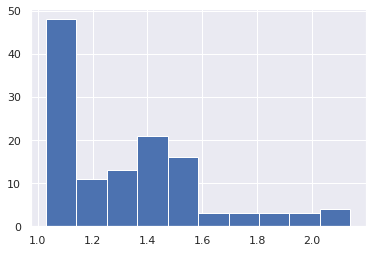

In [735]:
strin_brasil_Hi['reproduction_rate'].dropna().hist()

In [736]:
stats.shapiro(strin_brasil_Hi['reproduction_rate'].dropna())

ShapiroResult(statistic=0.8804649710655212, pvalue=1.3343123050901795e-08)

O test de shapiro nos mostrou que o p-value possui um valor menor do que o nível de significância (0,005), portanto, para os dados correspondetes a alta estringência a sua distribuição não segue uma normal.

In [737]:
stats.mannwhitneyu(strin_brasil_Lo['reproduction_rate'], strin_brasil_Hi['reproduction_rate'], alternative="greater")

MannwhitneyuResult(statistic=1852.5, pvalue=0.9999997906349755)

Segundo o test de mann-whitney, obteve-se um p-value maior do que o nível de significância. Isso quer dizer que ele falha em rejeitar a hipótese alternativa.

In [738]:
strin_brasil_Hi['new_cases_per_million'].describe()

count    125.000000
mean      95.799072
std       79.163854
min        1.520000
25%       22.234000
50%       80.570000
75%      151.431000
max      319.252000
Name: new_cases_per_million, dtype: float64

In [739]:
strin_brasil_Lo['new_cases_per_million'].dropna().describe()

count     56.000000
mean     147.522482
std      110.078231
min        0.000000
25%       65.740250
50%      130.806000
75%      181.245500
max      402.410000
Name: new_cases_per_million, dtype: float64

In [740]:
stats.shapiro(strin_brasil_Hi['new_cases_per_million'].dropna())

ShapiroResult(statistic=0.9219449162483215, pvalue=2.0627780941140372e-06)

## Comparação de mortes por milhão de países com população mais idosos com países de com populaçãos mais jovem



*   H0: Países com população mais idosas não têm maior número de mortes por milhão 
*   H1: Países com população mais idosas têm maior número de mortes por milhão



In [741]:
populacao_idosa_Hi = df.loc[(df['aged_65_older_category'] == 'População com muitíssimos velhos')]
populacao_idosa_Lo = df.loc[(df['aged_65_older_category'] == 'População com muitos velhos') | (df['aged_65_older_category'] == 'População com poucos velhos') | (df['aged_65_older_category'] == 'População com pouquíssimos velhos')]

In [742]:
populacao_idosa_Lo['total_deaths_per_million'].describe()

count    44146.000000
mean       223.117362
std        478.646402
min          0.001000
25%          6.857000
50%         34.626000
75%        226.676500
max       5898.608000
Name: total_deaths_per_million, dtype: float64

In [743]:
populacao_idosa_Hi['total_deaths_per_million'].describe()

count    15311.00000
mean       462.75930
std        661.63507
min          0.00800
25%         26.41100
50%        109.83000
75%        731.65700
max       3106.51300
Name: total_deaths_per_million, dtype: float64

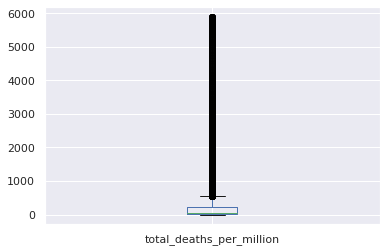

In [744]:
populacao_idosa_Lo['total_deaths_per_million'].plot(kind='box')

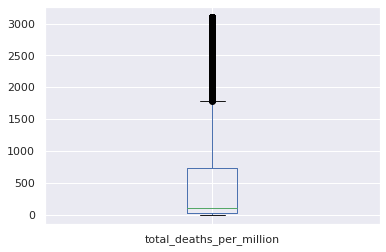

In [745]:
populacao_idosa_Hi['total_deaths_per_million'].plot(kind='box')

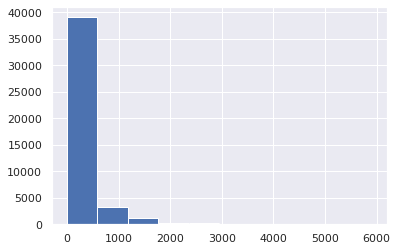

In [746]:
populacao_idosa_Lo['total_deaths_per_million'].dropna().hist()

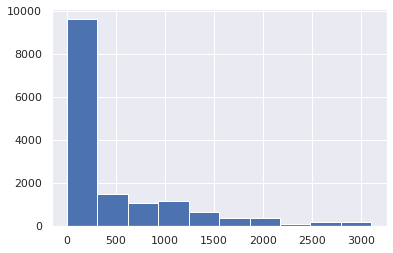

In [747]:
populacao_idosa_Hi['total_deaths_per_million'].dropna().hist()

In [748]:
stats.jarque_bera(populacao_idosa_Lo['total_deaths_per_million'].dropna())

Jarque_beraResult(statistic=3094578.9743206287, pvalue=0.0)

In [749]:
stats.jarque_bera(populacao_idosa_Hi['total_deaths_per_million'].dropna())

Jarque_beraResult(statistic=13486.3554222122, pvalue=0.0)

In [750]:
stats.shapiro(populacao_idosa_Lo['total_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.49084532260894775, pvalue=0.0)

In [751]:
stats.shapiro(populacao_idosa_Hi['total_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.7232848405838013, pvalue=0.0)

Os p-values obtidos foram muito baixos, portanto, ambas amostras não seguem uma distribuição normal. Então, usaremos o teste mann-whitney para amostras não pareadas.

In [752]:
stats.mannwhitneyu(populacao_idosa_Lo['total_deaths_per_million'], populacao_idosa_Hi['total_deaths_per_million'], alternative="greater")

MannwhitneyuResult(statistic=322002963.0, pvalue=1.0)

Segundo o test de mann-whitney, obteve-se um p-value maior do que o nível de significância. Isso quer dizer que ele falha em rejeitar a hipótese alternativa.

# **Análise exploratória dos dados**

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74141 entries, 0 to 74140
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               74141 non-null  object        
 1   continent                              70411 non-null  object        
 2   location                               74141 non-null  object        
 3   date                                   74141 non-null  datetime64[ns]
 4   total_cases                            70942 non-null  float64       
 5   new_cases                              70943 non-null  float64       
 6   new_cases_smoothed                     70213 non-null  float64       
 7   total_deaths                           64926 non-null  float64       
 8   new_deaths                             65069 non-null  float64       
 9   new_deaths_smoothed                    70213 non-null  float6

In [754]:
df['iso_code'] = df['iso_code'].astype('category')
df['continent'] = df['continent'].astype('category')
df['location'] = df['location'].astype('category')
df['date'] = df['date'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

In [755]:
df.dtypes

iso_code                  category
continent                 category
location                  category
date                      category
total_cases                float64
                            ...   
stringency_category         object
aged_65_older_category      object
log_population_density     float64
density_category            object
log_reproduction_rate      float64
Length: 68, dtype: object

In [756]:
df['continent'].cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [757]:
df['iso_code'].cat.categories

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARG', 'ARM', 'ATG', 'AUS',
       ...
       'PHL', 'PNG', 'POL', 'PRY', 'PSE', 'PYF', 'SLV', 'SWZ', 'TCD', 'VGB'],
      dtype='object', length=168)

In [758]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN


In [759]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
74136,POL,Europe,Poland,2020-11-05,466679.0,27143.0,21067.714,6842.0,367.0,241.857,12330.802,717.185,556.661,180.782,9.697,6.390,1.33,NaN,NaN,19114.0,505.039,NaN,NaN,NaN,NaN,65416.0,4845330.0,128.025,1.728,62969.0,1.664,0.335,3.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN,5.669018,3.835183,Desenvolvido,Media_estringencia,População com muitíssimos velhos,2.093516,Muito Povoado,0.123852
74137,POL,Europe,Poland,2020-11-06,493765.0,27086.0,21847.286,7287.0,445.0,276.571,13046.481,715.678,577.259,192.540,11.758,7.308,1.31,NaN,NaN,19479.0,514.683,NaN,NaN,NaN,NaN,74215.0,4919545.0,129.986,1.961,62777.0,1.659,0.348,2.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN,5.693520,3.862549,Desenvolvido,Media_estringencia,População com muitíssimos velhos,2.093516,Muito Povoado,0.117271
74138,POL,Europe,Poland,2020-11-07,521640.0,27875.0,22701.286,7636.0,349.0,286.429,13783.006,736.526,599.824,201.762,9.221,7.568,1.28,NaN,NaN,20249.0,535.028,NaN,NaN,NaN,NaN,65515.0,4985060.0,131.717,1.731,64038.0,1.692,0.354,2.8,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN,5.717371,3.882866,Desenvolvido,Alta_estringencia,População com muitíssimos velhos,2.093516,Muito Povoado,0.107210
74139,POL,Europe,Poland,2020-11-08,546425.0,24785.0,23789.000,7872.0,236.0,298.429,14437.887,654.880,628.564,207.998,6.236,7.885,1.25,NaN,NaN,20214.0,534.103,NaN,NaN,NaN,NaN,59764.0,5044824.0,133.297,1.579,65670.0,1.735,0.362,2.8,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,116.68,5.737531,3.896085,Desenvolvido,Alta_estringencia,População com muitíssimos velhos,2.093516,Muito Povoado,0.096910
74140,POL,Europe,Poland,2020-11-09,568138.0,21713.0,24665.429,8045.0,173.0,310.000,15011.597,573.711,651.721,212.569,4.571,8.191,1.21,NaN,NaN,20967.0,553.999,NaN,NaN,NaN,NaN,42114.0,5086938.0,134.409,1.113,62529.0,1.652,0.394,2.5,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,37846605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.754454,3.905526,NaN,Alta_estringencia,NaN,NaN,NaN,0.082785


In [760]:
df.shape

(74141, 68)

In [761]:
df.isnull().sum()

iso_code                      0
continent                  3730
location                      0
date                          0
total_cases                3199
                          ...  
stringency_category           0
aged_65_older_category        0
log_population_density     4587
density_category              0
log_reproduction_rate     14616
Length: 68, dtype: int64

# **Pré processamento**

Vamos excluir as seguintes colunas, pois possuem de 80 à 90 porcento de seus dados ausentes.

In [762]:
df_2 = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                      'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million'])

In [763]:
# Exluir do dataset colunasc que possuem ao menos 70% dos dados ausentes
df_2 = df.dropna(thresh=0.7*len(df), axis=1)

In [764]:
df_remove =  df_2[(df_2.continent=="Asia") | (df_2.continent=="Europe") | (df_2.continent=="North America") | (df_2.continent=="South America") | (df_2.continent=="Africa") | (df_2.continent=="Oceania")]

In [765]:
df_2 = df_remove

Uma forma de eliminar os dados ausentes da coluna 'location'

In [766]:
df_2.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                         3195
new_cases                           3198
new_cases_smoothed                  3887
total_deaths                        9058
new_deaths                          9059
new_deaths_smoothed                 3887
total_cases_per_million             3195
new_cases_per_million               3198
new_cases_smoothed_per_million      3887
total_deaths_per_million            9058
new_deaths_per_million              9059
new_deaths_smoothed_per_million     3887
reproduction_rate                  10884
stringency_index                    8050
population                           134
population_density                   857
median_age                          4793
aged_65_older                       4793
aged_70_older                       4793
gdp_per_capita                      4010
cardiovasc_death

In [767]:
df_2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,0.0,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,1.735774,Povoado,NaN


# Data imputation

Alguns exemplos de imputação de dados. Os metodos usados foram o de substituir pela média, pela mediana e o baseado nos 3 vizinhos mais próximos.

## **Média**

In [768]:
print(df['total_cases'].mean())
print(df['total_cases'].median())

768556.4478447182
16194.0


In [769]:
df_2['total_cases'].fillna(df_2['total_cases'].mean(), inplace=True)

In [770]:
df_2.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                            0
new_cases                           3198
new_cases_smoothed                  3887
total_deaths                        9058
new_deaths                          9059
new_deaths_smoothed                 3887
total_cases_per_million             3195
new_cases_per_million               3198
new_cases_smoothed_per_million      3887
total_deaths_per_million            9058
new_deaths_per_million              9059
new_deaths_smoothed_per_million     3887
reproduction_rate                  10884
stringency_index                    8050
population                           134
population_density                   857
median_age                          4793
aged_65_older                       4793
aged_70_older                       4793
gdp_per_capita                      4010
cardiovasc_death

In [771]:
print(df_2['total_cases'].mean())
print(df_2['total_cases'].median())

295925.06180077104
17365.0


In [772]:
df.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.807280,0.881092,0.965120,0.751021,0.835085,0.750787,0.619861,0.646886,0.719783,0.626131,0.691654,0.019252,0.778909,0.570381,0.730920,0.549190,0.712848,0.513251,0.749842,0.497510,0.760471,0.864800,0.416542,0.272484,0.767894,0.285060,0.354639,-0.330538,0.686186,0.728390,0.691470,0.681329,0.721471,0.064413,0.053803,0.011276,0.138065,0.142240,0.501831,0.065315,0.250195,0.247418,0.249769,0.242039,-0.216444,-0.170617,-0.001030,0.130808,0.012525,0.279094,0.054700,0.235319,0.240655,0.448708,1.000000,0.965120,0.065315,0.007971
new_cases,0.807280,1.000000,0.923596,0.762989,0.875107,0.861588,0.538805,0.830652,0.688454,0.497722,0.756625,0.705125,0.269998,0.838611,0.654860,0.830250,0.662308,0.800551,0.686369,0.881973,0.710235,0.729253,0.656373,0.195916,0.205884,0.712941,0.208323,0.568506,-0.552802,0.501774,0.553297,0.493092,0.575229,0.591455,-0.092868,-0.103491,-0.188356,0.088168,0.309129,0.508268,0.098589,0.297789,0.290173,0.290387,0.272055,-0.248347,-0.169086,0.029161,0.175904,0.040840,0.354388,0.084800,0.280310,0.282859,0.495606,0.807280,0.762989,0.098589,0.262378
new_cases_smoothed,0.881092,0.923596,1.000000,0.826450,0.860453,0.928402,0.602750,0.730474,0.765481,0.556443,0.735517,0.780301,0.255491,0.882372,0.709512,0.870713,0.712654,0.870742,0.709266,0.925120,0.721551,0.744427,0.691560,0.209904,0.199766,0.739681,0.215514,0.604444,-0.588636,0.520504,0.575047,0.512533,0.588175,0.613551,-0.097007,-0.107877,-0.193082,0.082875,0.295985,0.531116,0.072443,0.278027,0.272113,0.274727,0.264069,-0.237259,-0.176352,0.020596,0.167204,0.031513,0.363749,0.058287,0.257564,0.266315,0.538117,0.881092,0.826450,0.072443,0.246609
total_deaths,0.965120,0.762989,0.826450,1.000000,0.770269,0.831003,0.607902,0.493088,0.504489,0.716884,0.626422,0.623426,-0.015398,0.805465,0.447871,0.768378,0.461067,0.679656,0.349776,0.739510,0.355540,0.700211,0.766027,0.255885,0.143295,0.711132,0.159317,0.329790,-0.315960,0.649352,0.676525,0.630480,0.668882,0.698903,0.003414,-0.014091,-0.059954,0.083353,0.104461,0.573681,0.043038,0.257641,0.287474,0.283732,0.207688,-0.217832,-0.145564,0.015533,0.146477,0.025201,0.332422,0.056367,0.220108,0.223328,0.415660,0.965120,1.000000,0.043038,-0.027341
new_deaths,0.751021,0.875107,0.860453,0.770269,1.000000,0.915523,0.425469,0.625073,0.561702,0.507072,0.885561,0.714257,0.100495,0.898070,0.706306,0.906453,0.726359,0.823218,0.723356,0.876784,0.710107,0.579467,0.497953,0.012657,0.029988,0.577760,0.047529,0.557060,-0.549952,0.454788,0.508365,0.450974,0.539771,0.539602,-0.151649,-0.166301,-0.240029,0.024599,0.311696,0.518698,0.073830,0.253703,0.277809,0.272187,0.186883,-0.182895,-0.103927,0.082822,0.143289,0.060017,0.382569,0.042643,0.215080,0.211098,0.557039,0.751021,0.770269,0.073830,0.093423
new_deaths_smoothed,0.835085,0.861588

In [773]:
df_2.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.788526,0.870283,0.960854,0.725387,0.820436,0.768694,0.619653,0.653692,0.732768,0.621126,0.694066,0.019252,0.115679,0.360423,0.079260,0.258342,0.255610,0.256645,0.256494,-0.178254,0.024532,0.057315,0.258683,0.242639,1.000000,0.960854,0.079260,0.007971
new_cases,0.788526,1.000000,0.914745,0.736799,0.860969,0.846473,0.548730,0.848741,0.701715,0.501880,0.763169,0.710370,0.269998,0.309129,0.465863,0.098589,0.297789,0.290173,0.290387,0.272055,-0.169086,0.029161,0.084800,0.280310,0.282859,0.788526,0.736799,0.098589,0.262378
new_cases_smoothed,0.870283,0.914745,1.000000,0.807624,0.844597,0.921160,0.617457,0.740437,0.783577,0.564373,0.739815,0.790605,0.255491,0.295985,0.492601,0.072443,0.278027,0.272113,0.274727,0.264069,-0.176352,0.020596,0.058287,0.257564,0.266315,0.870283,0.807624,0.072443,0.246609
total_deaths,0.960854,0.736799,0.807624,1.000000,0.747501,0.815093,0.625671,0.491618,0.508889,0.731444,0.624047,0.627200,-0.015398,0.104461,0.533806,0.043038,0.257641,0.287474,0.283732,0.207688,-0.145564,0.015533,0.056367,0.220108,0.223328,0.960854,1.000000,0.043038,-0.027341
new_deaths,0.725387,0.860969,0.844597,0.747501,1.000000,0.906105,0.434911,0.635041,0.572210,0.513714,0.903033,0.725368,0.100495,0.311696,0.475395,0.073830,0.253703,0.277809,0.272187,0.186883,-0.103927,0.082822,0.042643,0.215080,0.211098,0.725387,0.747501,0.073830,0.093423
new_deaths_smoothed,0.820436,0.846473,0.921160,0.815093,0.906105,1.000000,0.557976,0.646279,0.677951,0.567257,0.794918,0.866704,0.122987,0.318045,0.500179,0.055949,0.253795,0.277006,0.275756,0.207505,-0.128343,0.032366,0.033659,0.224096,0.224063,0.820436,0.815093,0.055949,0.114235
total_cases_per_million,0.768694,0.548730,0.617457,0.625671,0.434911,0.557976,1.000000,0.703201,0.828612,0.941988,0.549295,0.713555,-0.077761,0.060825,-0.149035,0.081710,0.369673,0.318589,0.333338,0.375381,-0.242275,0.087534,0.287671,0.398219,0.404160,0.768694,0.625671,0.081710,-0.082604
new_cases_per_million,0.619653,0.848741,0.740437,0.491618,0.635041,0.646279,0.703201,1.000000,0.867123,0.635289,0.745272,0.753057,0.239357,0.262209,0.020510,0.091412,0.398398,0.347894,0.358899,0.364421,-0.211090,0.067436,0.264788,0.397880,0.399721,0.619653,0.491618,0.091412,0.231639
new_cases_smoothed_per_million,0.653692,0.701715,0.783577,0.508889,0.572210,0.677951,0.828612,0.867123,1.000000,0.748236,0.694497,0.836659,0.199716,0.243079,-0.091353,0.077878,0.408571,0.349100,0.364688,0.396634,-0.243274,0.101246,0.297356,0.420590,0.426710,0.653692,0.508889,0.077878,0.190959
total_deaths_per_million,0.732768,0.501880,0.564373,0.731444,0.513714,0.567257,0.941988,0.635289,0.748236,1.000000,0.598065,0.718938,-0.108071,0.020649,-0.123418,0.054100,0.410003,0.392504,0.402980,0.375194,-0.247844,0.099784,0.307801,0.423977,0.425818,0.732768,0.731444,0.054100,-0.115420


## **Mediana**

In [774]:
df_2['total_cases'].fillna(df_2['total_cases'].median(), inplace=True)

In [775]:
print(df_2['total_cases'].mean())
print(df_2['total_cases'].median())

295925.06180077104
17365.0


In [776]:
df.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.807280,0.881092,0.965120,0.751021,0.835085,0.750787,0.619861,0.646886,0.719783,0.626131,0.691654,0.019252,0.778909,0.570381,0.730920,0.549190,0.712848,0.513251,0.749842,0.497510,0.760471,0.864800,0.416542,0.272484,0.767894,0.285060,0.354639,-0.330538,0.686186,0.728390,0.691470,0.681329,0.721471,0.064413,0.053803,0.011276,0.138065,0.142240,0.501831,0.065315,0.250195,0.247418,0.249769,0.242039,-0.216444,-0.170617,-0.001030,0.130808,0.012525,0.279094,0.054700,0.235319,0.240655,0.448708,1.000000,0.965120,0.065315,0.007971
new_cases,0.807280,1.000000,0.923596,0.762989,0.875107,0.861588,0.538805,0.830652,0.688454,0.497722,0.756625,0.705125,0.269998,0.838611,0.654860,0.830250,0.662308,0.800551,0.686369,0.881973,0.710235,0.729253,0.656373,0.195916,0.205884,0.712941,0.208323,0.568506,-0.552802,0.501774,0.553297,0.493092,0.575229,0.591455,-0.092868,-0.103491,-0.188356,0.088168,0.309129,0.508268,0.098589,0.297789,0.290173,0.290387,0.272055,-0.248347,-0.169086,0.029161,0.175904,0.040840,0.354388,0.084800,0.280310,0.282859,0.495606,0.807280,0.762989,0.098589,0.262378
new_cases_smoothed,0.881092,0.923596,1.000000,0.826450,0.860453,0.928402,0.602750,0.730474,0.765481,0.556443,0.735517,0.780301,0.255491,0.882372,0.709512,0.870713,0.712654,0.870742,0.709266,0.925120,0.721551,0.744427,0.691560,0.209904,0.199766,0.739681,0.215514,0.604444,-0.588636,0.520504,0.575047,0.512533,0.588175,0.613551,-0.097007,-0.107877,-0.193082,0.082875,0.295985,0.531116,0.072443,0.278027,0.272113,0.274727,0.264069,-0.237259,-0.176352,0.020596,0.167204,0.031513,0.363749,0.058287,0.257564,0.266315,0.538117,0.881092,0.826450,0.072443,0.246609
total_deaths,0.965120,0.762989,0.826450,1.000000,0.770269,0.831003,0.607902,0.493088,0.504489,0.716884,0.626422,0.623426,-0.015398,0.805465,0.447871,0.768378,0.461067,0.679656,0.349776,0.739510,0.355540,0.700211,0.766027,0.255885,0.143295,0.711132,0.159317,0.329790,-0.315960,0.649352,0.676525,0.630480,0.668882,0.698903,0.003414,-0.014091,-0.059954,0.083353,0.104461,0.573681,0.043038,0.257641,0.287474,0.283732,0.207688,-0.217832,-0.145564,0.015533,0.146477,0.025201,0.332422,0.056367,0.220108,0.223328,0.415660,0.965120,1.000000,0.043038,-0.027341
new_deaths,0.751021,0.875107,0.860453,0.770269,1.000000,0.915523,0.425469,0.625073,0.561702,0.507072,0.885561,0.714257,0.100495,0.898070,0.706306,0.906453,0.726359,0.823218,0.723356,0.876784,0.710107,0.579467,0.497953,0.012657,0.029988,0.577760,0.047529,0.557060,-0.549952,0.454788,0.508365,0.450974,0.539771,0.539602,-0.151649,-0.166301,-0.240029,0.024599,0.311696,0.518698,0.073830,0.253703,0.277809,0.272187,0.186883,-0.182895,-0.103927,0.082822,0.143289,0.060017,0.382569,0.042643,0.215080,0.211098,0.557039,0.751021,0.770269,0.073830,0.093423
new_deaths_smoothed,0.835085,0.861588

In [777]:
df_2.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.788526,0.870283,0.960854,0.725387,0.820436,0.768694,0.619653,0.653692,0.732768,0.621126,0.694066,0.019252,0.115679,0.360423,0.079260,0.258342,0.255610,0.256645,0.256494,-0.178254,0.024532,0.057315,0.258683,0.242639,1.000000,0.960854,0.079260,0.007971
new_cases,0.788526,1.000000,0.914745,0.736799,0.860969,0.846473,0.548730,0.848741,0.701715,0.501880,0.763169,0.710370,0.269998,0.309129,0.465863,0.098589,0.297789,0.290173,0.290387,0.272055,-0.169086,0.029161,0.084800,0.280310,0.282859,0.788526,0.736799,0.098589,0.262378
new_cases_smoothed,0.870283,0.914745,1.000000,0.807624,0.844597,0.921160,0.617457,0.740437,0.783577,0.564373,0.739815,0.790605,0.255491,0.295985,0.492601,0.072443,0.278027,0.272113,0.274727,0.264069,-0.176352,0.020596,0.058287,0.257564,0.266315,0.870283,0.807624,0.072443,0.246609
total_deaths,0.960854,0.736799,0.807624,1.000000,0.747501,0.815093,0.625671,0.491618,0.508889,0.731444,0.624047,0.627200,-0.015398,0.104461,0.533806,0.043038,0.257641,0.287474,0.283732,0.207688,-0.145564,0.015533,0.056367,0.220108,0.223328,0.960854,1.000000,0.043038,-0.027341
new_deaths,0.725387,0.860969,0.844597,0.747501,1.000000,0.906105,0.434911,0.635041,0.572210,0.513714,0.903033,0.725368,0.100495,0.311696,0.475395,0.073830,0.253703,0.277809,0.272187,0.186883,-0.103927,0.082822,0.042643,0.215080,0.211098,0.725387,0.747501,0.073830,0.093423
new_deaths_smoothed,0.820436,0.846473,0.921160,0.815093,0.906105,1.000000,0.557976,0.646279,0.677951,0.567257,0.794918,0.866704,0.122987,0.318045,0.500179,0.055949,0.253795,0.277006,0.275756,0.207505,-0.128343,0.032366,0.033659,0.224096,0.224063,0.820436,0.815093,0.055949,0.114235
total_cases_per_million,0.768694,0.548730,0.617457,0.625671,0.434911,0.557976,1.000000,0.703201,0.828612,0.941988,0.549295,0.713555,-0.077761,0.060825,-0.149035,0.081710,0.369673,0.318589,0.333338,0.375381,-0.242275,0.087534,0.287671,0.398219,0.404160,0.768694,0.625671,0.081710,-0.082604
new_cases_per_million,0.619653,0.848741,0.740437,0.491618,0.635041,0.646279,0.703201,1.000000,0.867123,0.635289,0.745272,0.753057,0.239357,0.262209,0.020510,0.091412,0.398398,0.347894,0.358899,0.364421,-0.211090,0.067436,0.264788,0.397880,0.399721,0.619653,0.491618,0.091412,0.231639
new_cases_smoothed_per_million,0.653692,0.701715,0.783577,0.508889,0.572210,0.677951,0.828612,0.867123,1.000000,0.748236,0.694497,0.836659,0.199716,0.243079,-0.091353,0.077878,0.408571,0.349100,0.364688,0.396634,-0.243274,0.101246,0.297356,0.420590,0.426710,0.653692,0.508889,0.077878,0.190959
total_deaths_per_million,0.732768,0.501880,0.564373,0.731444,0.513714,0.567257,0.941988,0.635289,0.748236,1.000000,0.598065,0.718938,-0.108071,0.020649,-0.123418,0.054100,0.410003,0.392504,0.402980,0.375194,-0.247844,0.099784,0.307801,0.423977,0.425818,0.732768,0.731444,0.054100,-0.115420


## **Método baseado em KNN**

In [778]:
df_knn = df_2[df_2.location=="Brazil"]

In [779]:
df_knn = df_knn.drop(columns=["iso_code", "continent", "location", "date", "hdi_category", "stringency_category", "aged_65_older_category", "density_category"])

df_knn

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
12995,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,NaN,1.398634,NaN
12996,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,NaN,1.398634,NaN
12997,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,NaN,1.398634,NaN
12998,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,NaN,1.398634,NaN
12999,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,NaN,1.398634,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,19020499.0,57737.0,47575.714,531688.0,1509.0,1390.857,89483.214,271.628,223.823,2501.362,7.099,6.543,0.88,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.279222,5.725657,1.398634,-0.055517
13495,19069003.0,48504.0,46711.143,532893.0,1205.0,1329.429,89711.404,228.190,219.756,2507.031,5.669,6.254,0.88,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.280328,5.726640,1.398634,-0.055517
13496,19089940.0,20937.0,45733.143,533488.0,595.0,1295.857,89809.903,98.500,215.155,2509.830,2.799,6.096,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.280805,5.727125,1.398634,NaN
13497,19106971.0,17031.0,44922.857,534233.0,745.0,1303.000,89890.027,80.123,211.343,2513.335,3.505,6.130,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.281192,5.727731,1.398634,NaN


In [780]:
data_frame = df_knn

In [781]:
df_knn = KNN(k=3).fit_transform(df_knn)

Imputing row 1/504 with 11 missing, elapsed time: 0.054
Imputing row 101/504 with 0 missing, elapsed time: 0.057
Imputing row 201/504 with 0 missing, elapsed time: 0.057
Imputing row 301/504 with 0 missing, elapsed time: 0.058
Imputing row 401/504 with 0 missing, elapsed time: 0.058
Imputing row 501/504 with 1 missing, elapsed time: 0.059


In [782]:
data_frame = pd.DataFrame(data_frame)

In [783]:
list(data_frame.columns)

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'log_total_cases',
 'log_total_deaths',
 'log_population_density',
 'log_reproduction_rate']

In [784]:
df_3 = pd.DataFrame(data=df_knn[0:,0:],columns=['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'log_total_cases',
 'log_total_deaths',
 'log_population_density',
 'log_reproduction_rate'])

In [785]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
0,1.0,1.0,0.326823,2.427681,1.650557,0.0,0.005,0.005,0.001285,0.011488,0.007729,0.0,2.489772,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288107,1.398634,0.396097
1,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092
2,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092
3,2.0,1.0,0.329902,2.426464,1.650088,0.0,0.009,0.005,0.001307,0.011482,0.007727,0.0,2.489720,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.287932,1.398634,0.396088
4,2.0,0.0,0.329790,2.427177,1.650427,0.0,0.009,0.000,0.001306,0.011485,0.007728,0.0,2.489690,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.288088,1.398634,0.396083


In [786]:
df_3.isnull().sum()

total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
hospital_beds_per_thousand         0
life_expectancy                    0
human_development_index            0
log_total_cases                    0
log_total_deaths                   0
l

In [787]:
print(df_3['total_cases'].mean())
print(df_3['total_cases'].median())

6866582.305555556
5578037.0


In [788]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70411 entries, 0 to 74140
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   iso_code                         70411 non-null  category
 1   continent                        70411 non-null  category
 2   location                         70411 non-null  category
 3   date                             70411 non-null  category
 4   total_cases                      70411 non-null  float64 
 5   new_cases                        67213 non-null  float64 
 6   new_cases_smoothed               66524 non-null  float64 
 7   total_deaths                     61353 non-null  float64 
 8   new_deaths                       61352 non-null  float64 
 9   new_deaths_smoothed              66524 non-null  float64 
 10  total_cases_per_million          67216 non-null  float64 
 11  new_cases_per_million            67213 non-null  float64 
 12  new_

In [789]:
df_2_brasil = df_2[df_2.location=="Brazil"]

In [790]:
df_2_brasil = df_2_brasil.reset_index(drop=True)

In [791]:
df_3['iso_code'] = df_2_brasil['iso_code']
df_3['continent'] = df_2_brasil['continent']
df_3['location'] = df_2_brasil['location']
df_3['date'] = df_2_brasil['date']
df_3['hdi_category'] = df_2_brasil['hdi_category']
df_3['stringency_category'] = df_2_brasil['stringency_category']
df_3['aged_65_older_category'] = df_2_brasil['aged_65_older_category']
df_3['density_category'] = df_2_brasil['density_category']

In [792]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category
0,1.0,1.0,0.326823,2.427681,1.650557,0.0,0.005,0.005,0.001285,0.011488,0.007729,0.0,2.489772,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288107,1.398634,0.396097,BRA,South America,Brazil,2020-02-26,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado
1,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-27,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado
2,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-28,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado
3,2.0,1.0,0.329902,2.426464,1.650088,0.0,0.009,0.005,0.001307,0.011482,0.007727,0.0,2.489720,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.287932,1.398634,0.396088,BRA,South America,Brazil,2020-02-29,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado
4,2.0,0.0,0.329790,2.427177,1.650427,0.0,0.009,0.000,0.001306,0.011485,0.007728,0.0,2.489690,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.288088,1.398634,0.396083,BRA,South America,Brazil,2020-03-01,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado


In [793]:
df_2_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,hdi_category,stringency_category,aged_65_older_category,log_population_density,density_category,log_reproduction_rate
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,NaN,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,1.398634,Pouco Povoado,NaN


In [794]:
df_3.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.715561,0.876193,0.999857,0.644932,0.749994,1.000000,0.715561,0.876193,0.999857,0.644932,0.750000,-0.593010,-0.467651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999857,NaN,-0.593015
new_cases,0.715561,1.000000,0.817523,0.715433,0.900332,0.744872,0.715561,1.000000,0.817523,0.715433,0.900332,0.744908,-0.405213,-0.131028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715561,0.715433,NaN,-0.404787
new_cases_smoothed,0.876193,0.817523,1.000000,0.876055,0.773114,0.900209,0.876193,0.817523,1.000000,0.876055,0.773114,0.900221,-0.505816,-0.179403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876193,0.876055,NaN,-0.505815
total_deaths,0.999857,0.715433,0.876055,1.000000,0.645075,0.749974,0.999857,0.715433,0.876055,1.000000,0.645075,0.749980,-0.593003,-0.467849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999857,1.000000,NaN,-0.593008
new_deaths,0.644932,0.900332,0.773114,0.645075,1.000000,0.848745,0.644932,0.900332,0.773114,0.645075,1.000000,0.848781,-0.389101,0.038325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.644932,0.645075,NaN,-0.388646
new_deaths_smoothed,0.749994,0.744872,0.900209,0.749974,0.848745,1.000000,0.749994,0.744872,0.900209,0.749974,0.848745,1.000000,-0.468654,0.032080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.749994,0.749974,NaN,-0.468644
total_cases_per_million,1.000000,0.715561,0.876193,0.999857,0.644932,0.749994,1.000000,0.715561,0.876193,0.999857,0.644932,0.750000,-0.593010,-0.467651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999857,NaN,-0.593015
new_cases_per_million,0.715561,1.000000,0.817523,0.715433,0.900332,0.744872,0.715561,1.000000,0.817523,0.715433,0.900332,0.744908,-0.405213,-0.131028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715561,0.715433,NaN,-0.404787
new_cases_smoothed_per_million,0.876193,0.817523,1.000000,0.876055,0.773114,0.900209,0.876193,0.817523,1.000000,0.876055,0.773114,0.900221,-0.505816,-0.179403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876193,0.876055,NaN,-0.505815
total_deaths_per_million,0.999857,0.715433,0.876055,1.000000,0.645075,0.749974,0.999857,0.715433,0.876055,1.000000,0.645075,0.749980,-0.593003,-0.467849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999857,1.000000,NaN,-0.593008


In [795]:
df_2_brasil.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.000000,0.715561,0.872436,1.000000,0.602516,0.742427,1.000000,0.715561,0.872436,1.000000,0.602516,0.742432,-0.540631,-0.461038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-0.540631
new_cases,0.715561,1.000000,0.812308,0.681456,0.887641,0.737433,0.715561,1.000000,0.812308,0.681456,0.887641,0.737469,-0.351926,-0.132245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715561,0.681456,NaN,-0.351926
new_cases_smoothed,0.872436,0.812308,1.000000,0.860204,0.745891,0.897199,0.872436,0.812308,1.000000,0.860204,0.745891,0.897212,-0.454433,-0.213470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872436,0.860204,NaN,-0.454433
total_deaths,1.000000,0.681456,0.860204,1.000000,0.602516,0.717747,1.000000,0.681456,0.860204,1.000000,0.602516,0.717753,-0.531986,-0.652885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-0.531986
new_deaths,0.602516,0.887641,0.745891,0.602516,1.000000,0.830958,0.602516,0.887641,0.745891,0.602516,1.000000,0.830999,-0.318384,-0.077592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.602516,0.602516,NaN,-0.318384
new_deaths_smoothed,0.742427,0.737433,0.897199,0.717747,0.830958,1.000000,0.742427,0.737433,0.897199,0.717747,0.830958,1.000000,-0.407185,0.018102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742427,0.717747,NaN,-0.407185
total_cases_per_million,1.000000,0.715561,0.872436,1.000000,0.602516,0.742427,1.000000,0.715561,0.872436,1.000000,0.602516,0.742432,-0.540631,-0.461038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-0.540631
new_cases_per_million,0.715561,1.000000,0.812308,0.681456,0.887641,0.737433,0.715561,1.000000,0.812308,0.681456,0.887641,0.737469,-0.351926,-0.132245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715561,0.681456,NaN,-0.351926
new_cases_smoothed_per_million,0.872436,0.812308,1.000000,0.860204,0.745891,0.897199,0.872436,0.812308,1.000000,0.860204,0.745891,0.897212,-0.454433,-0.213470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872436,0.860204,NaN,-0.454433
total_deaths_per_million,1.000000,0.681456,0.860204,1.000000,0.602516,0.717747,1.000000,0.681456,0.860204,1.000000,0.602516,0.717753,-0.531986,-0.652885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-0.531986


# **Detecção de outliers**

In [796]:
df_3[df_3.duplicated()].sort_values('total_cases').head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category


In [797]:
df_3['new_deaths'].describe()

count     504.000000
mean     1063.234942
std       854.113931
min         0.000000
25%       496.250000
50%       888.500000
75%      1312.250000
max      4249.000000
Name: new_deaths, dtype: float64

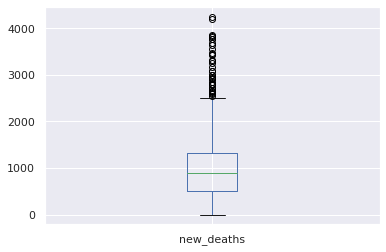

In [798]:
df_3['new_deaths'].plot.box()

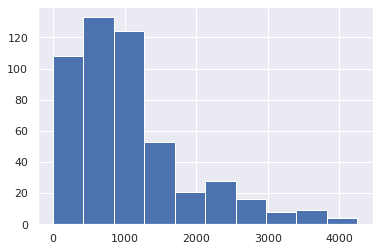

In [799]:
df_3['new_deaths'].hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



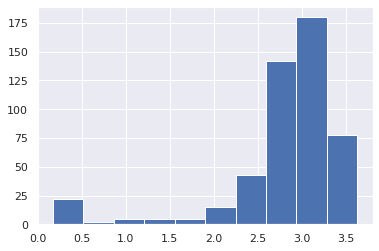

In [800]:
from numpy import log10

#df['log_total_cases'] = df['total_cases'].apply(np.log10)
#df[df['log_total_cases'] > 0]['log_total_cases'].hist()

df_3['new_deaths_log'] = log10(df_3['new_deaths'])
df_3[df_3['new_deaths_log'] > 0]['new_deaths_log'].hist()

In [801]:
from numpy import abs

MAD = abs(df_3['new_deaths_log'] - df_3['new_deaths_log'].median()).median()*(1/0.6745)

print(MAD)

0.30647633157184334


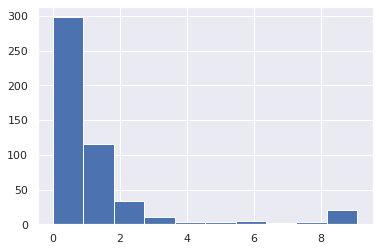

In [802]:
# Plotar o z-score robusto

(abs(df_3[df_3['new_deaths_log'] > 0]['new_deaths_log']-df_3[df_3['new_deaths_log'] > 0]['new_deaths_log'].median())/MAD).hist()

In [803]:
df_3[abs(df_3['new_deaths_log']-df_3['new_deaths_log'].median())/MAD > 5]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log
0,1.0,1.0,0.326823,2.427681,1.650557,0.000,0.005,0.005,0.001285,0.011488,0.007729,0.000,2.489772,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288107,1.398634,0.396097,BRA,South America,Brazil,2020-02-26,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217630
1,1.0,0.0,0.326640,2.428390,1.650894,0.000,0.005,0.000,0.001284,0.011491,0.007730,0.000,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-27,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719
2,1.0,0.0,0.326640,2.428390,1.650894,0.000,0.005,0.000,0.001284,0.011491,0.007730,0.000,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-28,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719
3,2.0,1.0,0.329902,2.426464,1.650088,0.000,0.009,0.005,0.001307,0.011482,0.007727,0.000,2.489720,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287932,1.398634,0.396088,BRA,South America,Brazil,2020-02-29,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217507
4,2.0,0.0,0.329790,2.427177,1.650427,0.000,0.009,0.000,0.001306,0.011485,0.007728,0.000,2.489690,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.288088,1.398634,0.396083,BRA,South America,Brazil,2020-03-01,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217596
5,2.0,0.0,0.286000,2.425097,1.649530,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489601,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287711,1.398634,0.396068,BRA,South America,Brazil,2020-03-02,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217360
6,2.0,0.0,0.286000,2.425097,1.649530,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489601,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287711,1.398634,0.396068,BRA,South America,Brazil,2020-03-03,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217360
7,4.0,2.0,0.429000,2.421228,1.647910,0.000,0.019,0.009,0.002000,0.011458,0.007717,0.000,2.489553,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.602060,0.287048,1.398634,0.396059,BRA,South America,Brazil,2020-03-04,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.216933
8,4.0,0.0,0.429000,2.422663,1.648592,0.000,0.019,0.000,0.002000,0.011465,0.007720,0.000,2.489492,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.602060,0.287361,1.398634,0.396049,BRA,South America,Brazil,2020-03-05,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217113
9,13.0,9.0,1.714000,2.404779,1.641090,0.000,0.061,0.042,0.008000,0.011383,0.007687,0.000,2.489292,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1.113943,0.284289,1.398634,0.396014,BRA,South America,Brazil,2020-03-06,Em Desenvolvimento,Nenhuma_estringe

In [804]:
# Remoção das instâncias
df_3_sem_outliers = df_3[abs(df_3['new_deaths_log']-df_3['new_deaths_log'].median())/MAD < 5]
print(len(df_3_sem_outliers))

464


# Removendo outliers utilizando método de tukey (univariado)

In [805]:
df_3['new_cases'].describe()

count       504.000000
mean      37999.986111
std       26097.869943
min           0.000000
25%       17102.000000
50%       34792.000000
75%       56677.500000
max      115228.000000
Name: new_cases, dtype: float64

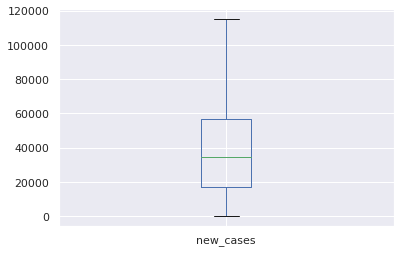

In [806]:
df_3['new_cases'].plot.box()

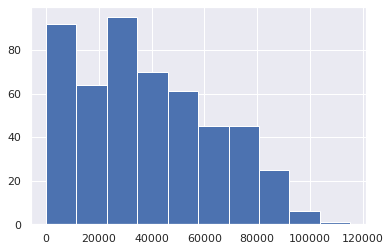

In [807]:
df_3['new_cases'].hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



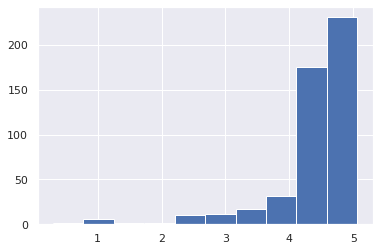

In [808]:
df_3['new_cases_log'] = log10(df_3['new_cases'])
df_3[df_3['new_cases_log'] > 0]['new_cases_log'].hist()

In [809]:
q1 = df_3['new_cases_log'].quantile(q=0.25)
q3 = df_3['new_cases_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.5203637497897073


In [810]:
df_3[df_3['new_cases_log'] < (q1-1.5*iqr)]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
0,1.0,1.0,0.326823,2.427681,1.650557,0.000,0.005,0.005,0.001285,0.011488,0.007729,0.000,2.489772,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288107,1.398634,0.396097,BRA,South America,Brazil,2020-02-26,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217630,0.000000
1,1.0,0.0,0.326640,2.428390,1.650894,0.000,0.005,0.000,0.001284,0.011491,0.007730,0.000,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-27,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719,-inf
2,1.0,0.0,0.326640,2.428390,1.650894,0.000,0.005,0.000,0.001284,0.011491,0.007730,0.000,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.000000,0.288262,1.398634,0.396092,BRA,South America,Brazil,2020-02-28,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719,-inf
3,2.0,1.0,0.329902,2.426464,1.650088,0.000,0.009,0.005,0.001307,0.011482,0.007727,0.000,2.489720,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287932,1.398634,0.396088,BRA,South America,Brazil,2020-02-29,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217507,0.000000
4,2.0,0.0,0.329790,2.427177,1.650427,0.000,0.009,0.000,0.001306,0.011485,0.007728,0.000,2.489690,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.288088,1.398634,0.396083,BRA,South America,Brazil,2020-03-01,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217596,-inf
5,2.0,0.0,0.286000,2.425097,1.649530,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489601,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287711,1.398634,0.396068,BRA,South America,Brazil,2020-03-02,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217360,-inf
6,2.0,0.0,0.286000,2.425097,1.649530,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489601,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.301030,0.287711,1.398634,0.396068,BRA,South America,Brazil,2020-03-03,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217360,-inf
7,4.0,2.0,0.429000,2.421228,1.647910,0.000,0.019,0.009,0.002000,0.011458,0.007717,0.000,2.489553,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.602060,0.287048,1.398634,0.396059,BRA,South America,Brazil,2020-03-04,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.216933,0.301030
8,4.0,0.0,0.429000,2.422663,1.648592,0.000,0.019,0.000,0.002000,0.011465,0.007720,0.000,2.489492,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.602060,0.287361,1.398634,0.396049,BRA,South America,Brazil,2020-03-05,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217113,-inf
9,13.0,9.0,1.714000,2.404779,1.641090,0.000,0.061,0.042,0.008000,0.011383,0.007687,0.000,2.489292,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1.113943,0.284289,1.398634,0.396014,

In [811]:
df_3_sem_outliers = df_3[(df_3['new_cases_log'] > (q1-1.5*iqr)) & (df_3['new_cases_log'] < (q3+1.5*iqr))]
len(df_3_sem_outliers)

444

# **Séries temporais**

In [812]:
df_3['date'] = pd.to_datetime(df_3['date'])

In [813]:
df_3.set_index('date', inplace=True)

In [814]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,1.0,1.0,0.326823,2.427681,1.650557,0.0,0.005,0.005,0.001285,0.011488,0.007729,0.0,2.489772,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288107,1.398634,0.396097,BRA,South America,Brazil,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217630,0.0
2020-02-27,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092,BRA,South America,Brazil,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719,-inf
2020-02-28,1.0,0.0,0.326640,2.428390,1.650894,0.0,0.005,0.000,0.001284,0.011491,0.007730,0.0,2.489742,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.00000,0.288262,1.398634,0.396092,BRA,South America,Brazil,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217719,-inf
2020-02-29,2.0,1.0,0.329902,2.426464,1.650088,0.0,0.009,0.005,0.001307,0.011482,0.007727,0.0,2.489720,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.287932,1.398634,0.396088,BRA,South America,Brazil,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217507,0.0
2020-03-01,2.0,0.0,0.329790,2.427177,1.650427,0.0,0.009,0.000,0.001306,0.011485,0.007728,0.0,2.489690,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0.30103,0.288088,1.398634,0.396083,BRA,South America,Brazil,Em Desenvolvimento,Nenhuma_estringencia,População com muitos velhos,Pouco Povoado,0.217596,-inf


In [815]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-02-26 to 2021-07-13
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   total_cases                      504 non-null    float64 
 1   new_cases                        504 non-null    float64 
 2   new_cases_smoothed               504 non-null    float64 
 3   total_deaths                     504 non-null    float64 
 4   new_deaths                       504 non-null    float64 
 5   new_deaths_smoothed              504 non-null    float64 
 6   total_cases_per_million          504 non-null    float64 
 7   new_cases_per_million            504 non-null    float64 
 8   new_cases_smoothed_per_million   504 non-null    float64 
 9   total_deaths_per_million         504 non-null    float64 
 10  new_deaths_per_million           504 non-null    float64 
 11  new_deaths_smoothed_per_million  504 non-null    flo

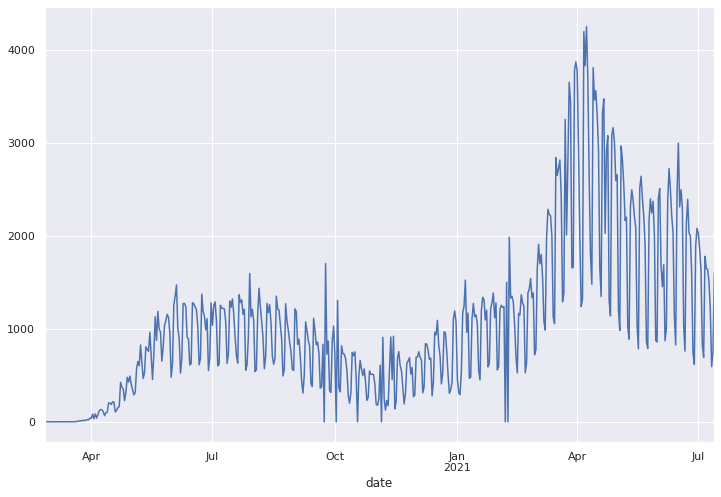

In [816]:
plt.figure(figsize=(12, 8))
data = df_3.new_deaths
data.plot()

In [817]:
data_frame_tseries = pd.DataFrame(data)

In [818]:
#df_4 = pd.DataFrame(np.arange(len(date)), index=date)
#df_4.tail()

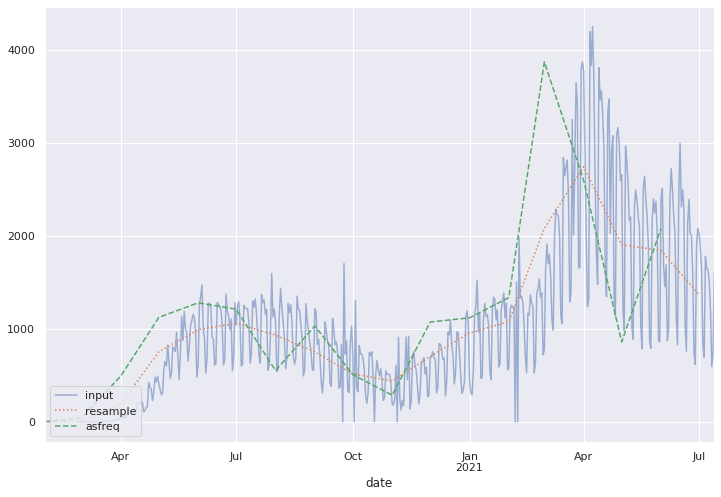

In [819]:
plt.figure(figsize=(12, 8))
data["2020":].plot(alpha=0.5, style='-')
data.resample('BM').mean().plot(style=':')
data.asfreq('BM').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='lower left');

## Janela deslizante

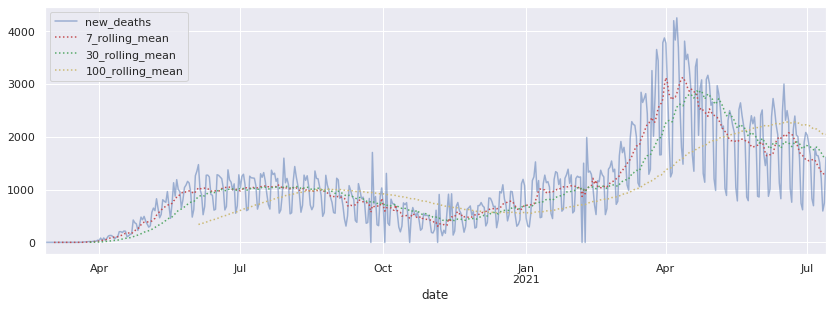

In [820]:
# Média móvel

plt.figure(figsize=(14, 10))

plt.subplot(211)
data.plot(alpha=.5)
(data.rolling(7)
 .mean()
 .plot(label="7_rolling_mean", style='r:', alpha=1)
)
(data.rolling(30)
 .mean()
 .plot(label="30_rolling_mean", style='g:', alpha=1)
)
(data.rolling(100)
 .mean()
 .plot(label="100_rolling_mean", style='y:', alpha=1)
)
plt.legend()

Quanto menor a janela da média móvel, menos erro de predição teremos

date
2020-02-29         NaN
2020-03-31         NaN
2020-04-30    2.884037
2020-05-31    2.383247
2020-06-30    1.529473
2020-07-31    1.140790
2020-08-31    0.941901
2020-09-30    0.802686
2020-10-31    0.709045
2020-11-30    0.767467
2020-12-31    1.284134
2021-01-31    1.372098
2021-02-28    1.116008
2021-03-31    1.577983
2021-04-30    1.376629
2021-05-31    0.851724
2021-06-30    0.843674
2021-07-31    0.403735
Freq: M, Name: new_deaths, dtype: float64


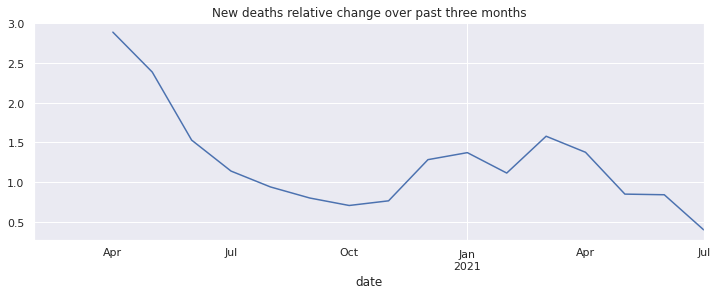

In [821]:
plt.figure(figsize=(12, 4))
monthly = data.resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="New deaths relative change over past three months")
print(diff)

O diff significa que, por exemplo, a média de 2020-04-30 foi 2.8 vezes maior do que a dos últimos três meses

date
2020-02-29         NaN
2020-03-31         NaN
2020-04-30    2.803285
2020-05-31    2.491975
2020-06-30    1.906131
2020-07-31    1.468309
2020-08-31    1.101354
2020-09-30    0.794389
2020-10-31    0.756672
2020-11-30    0.988966
2020-12-31    1.403222
2021-01-31    1.249964
2021-02-28    0.958296
2021-03-31    1.299578
2021-04-30    1.050696
2021-05-31    0.944169
2021-06-30    1.038972
2021-07-31    0.397187
Freq: M, Name: new_cases, dtype: float64


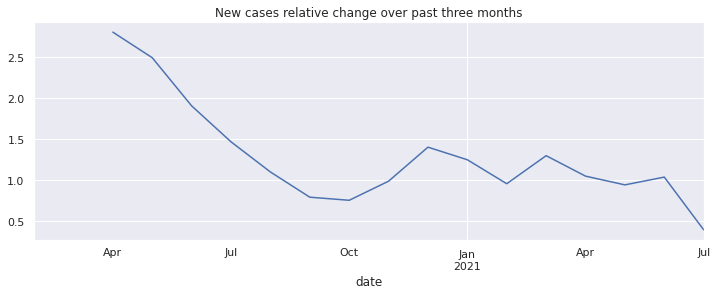

In [822]:
plt.figure(figsize=(12, 4))
monthly = df_3['new_cases'].resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="New cases relative change over past three months")
print(diff)

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-07-09    1.084942
2021-07-10    0.906404
2021-07-11    0.459156
2021-07-12    0.571757
2021-07-13    1.255869
Freq: D, Name: new_deaths, Length: 504, dtype: float64


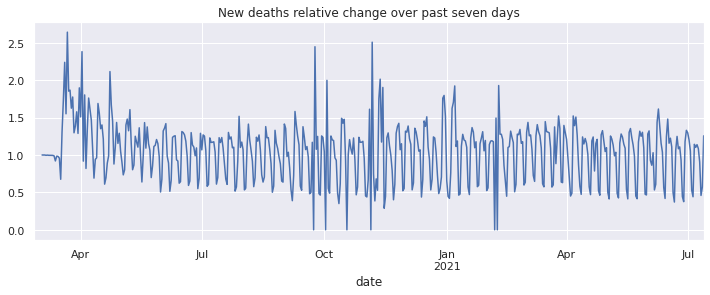

In [823]:
plt.figure(figsize=(12, 4))
monthly = data.resample("d").sum()
diff = (monthly / monthly.rolling(7).mean())
diff.plot(title="New deaths relative change over past seven days")
print(diff)

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-07-09    1.213581
2021-07-10    1.038382
2021-07-11    0.457808
2021-07-12    0.379117
2021-07-13    1.061203
Freq: D, Name: new_cases, Length: 504, dtype: float64


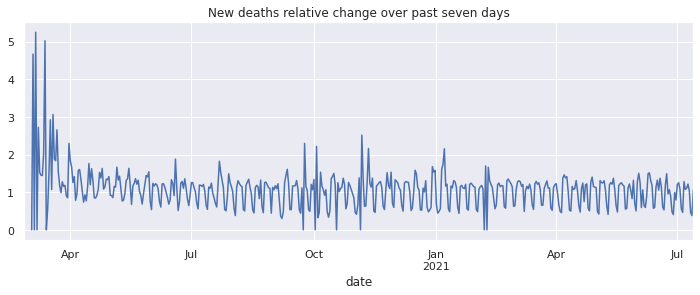

In [824]:
plt.figure(figsize=(12, 4))
monthly = df_3['new_cases'].resample("d").sum()
diff = (monthly / monthly.rolling(7).mean())
diff.plot(title="New deaths relative change over past seven days")
print(diff)

É visível que, analizando as médias móveis com intervalos de sete dias (uma semana), existe uma sazonalidade no comportamento da distribuição dos dados, tanto no número de mortes quanto no número de casos. Provavelmente isso ocorre pelo fato de um máximo local se referir ao dia em que as ocorrências dos hospitais sejam registrados.

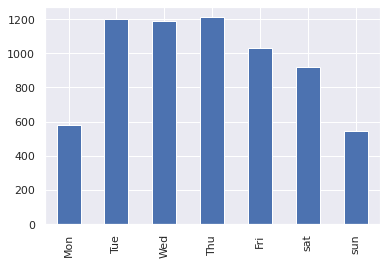

In [825]:
median_by_day = df_3.new_deaths.groupby(df_3.new_deaths.index.dayofweek).median()
median_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "sat", "sun"]
median_by_day.plot(kind="bar")

In [826]:
prophet_df = df_3[["new_deaths"]].reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df.tail()

,ds,y
499,2021-07-09,1509.0
500,2021-07-10,1205.0
501,2021-07-11,595.0
502,2021-07-12,745.0
503,2021-07-13,1605.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


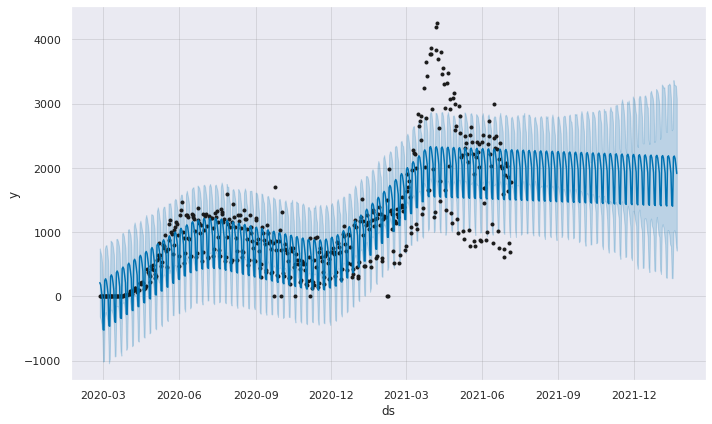

In [827]:
m = Prophet()
m.fit(prophet_df[:-7])
pred = m.predict(m.make_future_dataframe(periods=200))
m.plot(pred);

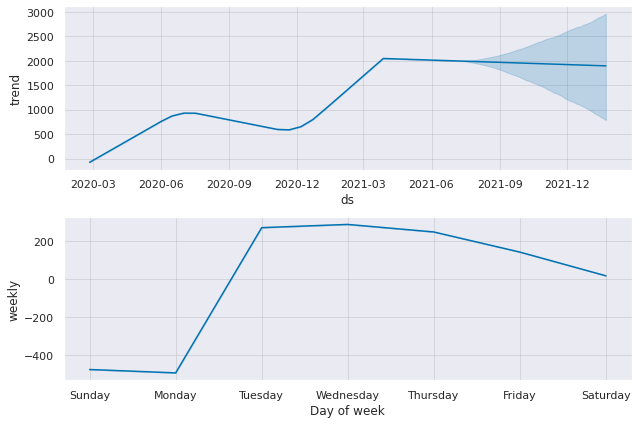

In [828]:
m.plot_components(pred);

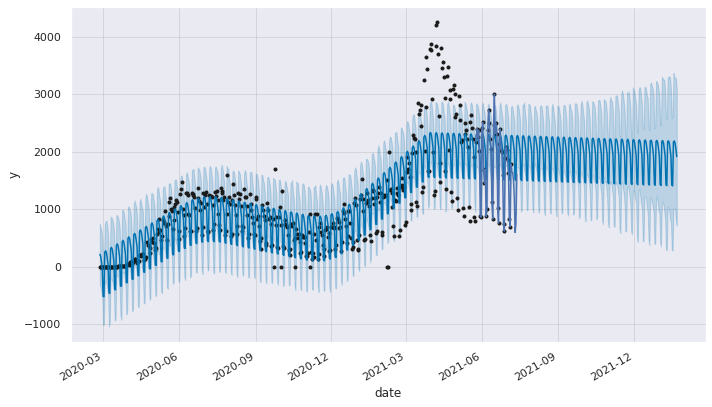

In [829]:
m.plot(pred);
df_3.new_deaths[-50:].plot()